<a href="https://colab.research.google.com/github/peppinob-ol/circuit-tracer/blob/main/demos/attribute_demoXpromptrover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attribution Demo

<a target="_blank" href="https://colab.research.google.com/github/safety-research/circuit-tracer/blob/main/demos/attribute_demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In this demo, you'll learn how to load models and perform attribution on them.

In [1]:
#@title Colab Setup Environment

try:
    import google.colab
    !mkdir -p repository && cd repository && \
     git clone https://github.com/safety-research/circuit-tracer && \
     curl -LsSf https://astral.sh/uv/install.sh | sh && \
     uv pip install -e circuit-tracer/

    import sys
    from huggingface_hub import notebook_login
    sys.path.append('repository/circuit-tracer')
    sys.path.append('repository/circuit-tracer/demos')
    notebook_login(new_session=False)
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

fatal: destination path 'circuit-tracer' already exists and is not an empty directory.


In [2]:
# 🔄 1. Allinea le versioni dei pacchetti
!pip install --quiet --no-cache-dir "numpy<2.0,>=1.23" --upgrade
!pip install --quiet --no-cache-dir --upgrade circuit_tracer
# riavvia runtime

In [2]:
from pathlib import Path
import torch

from circuit_tracer import ReplacementModel, attribute
from circuit_tracer.utils import create_graph_files

First, load your model and transcoders by name. `model_name` is a normal HuggingFace / [TransformerLens](https://github.com/TransformerLensOrg/TransformerLens) model name; we'll use `google/gemma-2-2b`. We set `transcoder_name` to `gemma`, which is shorthand for the [Gemma Scope](https://arxiv.org/abs/2408.05147) transcoders; we take the transcoders with lowest L0 (mean # of active features) for each layer.

We additionally support `model_name = "meta-llama/Llama-3.2-1B"`, with `"llama"` transcoders; these are ReLU skip-transcoders that we trained, available [here](https://huggingface.co/mntss/skip-transcoder-Llama-3.2-1B-131k-nobos/tree/new-training).

If you want to use other models, you'll have to provide your own transcoders. To do this, set `transcoder_name` to point to your own configuration file, specifying the list of transcoders that you want to use. You can see `circuit_tracer/configs` for example configs.

In [3]:
model_name = 'google/gemma-2-2b'
transcoder_name = "gemma"
model = ReplacementModel.from_pretrained(model_name, transcoder_name, dtype=torch.bfloat16)

config.yaml: 0.00B [00:00, ?B/s]

Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

layer_3/width_16k/average_l0_54/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_4/width_16k/average_l0_88/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_6/width_16k/average_l0_95/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_2/width_16k/average_l0_49/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_1/width_16k/average_l0_65/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_7/width_16k/average_l0_70/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_5/width_16k/average_l0_87/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_0/width_16k/average_l0_76/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_8/width_16k/average_l0_52/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_9/width_16k/average_l0_72/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_10/width_16k/average_l0_88/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_11/width_16k/average_l0_5/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_12/width_16k/average_l0_6/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_13/width_16k/average_l0_8/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_14/width_16k/average_l0_8/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_15/width_16k/average_l0_8/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_16/width_16k/average_l0_10/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_17/width_16k/average_l0_12/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_18/width_16k/average_l0_13/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_19/width_16k/average_l0_12/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_20/width_16k/average_l0_11/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_21/width_16k/average_l0_13/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_22/width_16k/average_l0_15/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_23/width_16k/average_l0_25/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_24/width_16k/average_l0_37/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_25/width_16k/average_l0_41/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/481M [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Loaded pretrained model google/gemma-2-2b into HookedTransformer


Next, set your attribution arguments.

In [4]:
prompt = "The capital of state containing Dallas is"  # What you want to get the graph for
max_n_logits = 10   # How many logits to attribute from, max. We attribute to min(max_n_logits, n_logits_to_reach_desired_log_prob); see below for the latter
desired_logit_prob = 0.95  # Attribution will attribute from the minimum number of logits needed to reach this probability mass (or max_n_logits, whichever is lower)
max_feature_nodes = 8192  # Only attribute from this number of feature nodes, max. Lower is faster, but you will lose more of the graph. None means no limit.
batch_size=256  # Batch size when attributing
offload='disk' if IN_COLAB else 'cpu' # Offload various parts of the model during attribution to save memory. Can be 'disk', 'cpu', or None (keep on GPU)
verbose = True  # Whether to display a tqdm progress bar and timing report

Then, just run attribution!

In [5]:
graph = attribute(
    prompt=prompt,
    model=model,
    max_n_logits=max_n_logits,
    desired_logit_prob=desired_logit_prob,
    batch_size=batch_size,
    max_feature_nodes=max_feature_nodes,
    offload=offload,
    verbose=verbose
)

Phase 0: Precomputing activations and vectors
Precomputation completed in 1.17s
Found 6362 active features
Phase 1: Running forward pass
Forward pass completed in 0.21s
Phase 2: Building input vectors
Selected 10 logits with cumulative probability 0.7148
Will include 6362 of 6362 feature nodes
Input vectors built in 7.91s
Phase 3: Computing logit attributions
Logit attributions completed in 0.26s
Phase 4: Computing feature attributions
Feature influence computation: 100%|██████████| 6362/6362 [00:01<00:00, 4205.91it/s]
Feature attributions completed in 1.52s
Attribution completed in 32.64s


We now have a graph object! We can save it as a .pt file, but be warned that it's large (~167MB).

In [6]:
graph_dir = 'graphs'
graph_name = 'example_graph.pt'
graph_dir = Path(graph_dir)
graph_dir.mkdir(exist_ok=True)
graph_path = graph_dir / graph_name

graph.to_pt(graph_path)

Given this object, we can create the graph files that we need to visualize the graph. Give it a slug (name), and set the node / edge thresholds for pruning. Pruning removes unimportant nodes and edges from your graph; lower thresholds (i.e., more aggressive pruning) results in smaller graphs. These may be easier to interpret, but explain less of the model's behavior.

In [7]:
slug = "dallas-austin"  # this is the name that you assign to the graph
graph_file_dir = './graph_files'  # where to write the graph files. no need to make this one; create_graph_files does that for you
node_threshold=0.8  # keep only the minimum # of nodes whose cumulative influence is >= 0.8
edge_threshold=0.98  # keep only the minimum # of edges whose cumulative influence is >= 0.98

create_graph_files(
    graph_or_path=graph_path,  # the graph to create files for
    slug=slug,
    output_path=graph_file_dir,
    node_threshold=node_threshold,
    edge_threshold=edge_threshold
)

# Stato di avanzamento attuale

In [8]:
#@title 07.08.2025 — decoder Gemma Scope ➜ metriche statiche + CSV
"""
Calcola per ogni feature del graph:
  • frac_external_raw  – 1 − self-weight sul residual stream
  • logit_influence    – norma dell’influenza diretta + indiretta sul logit

Nota ▸ Con grafi di attribution “puri” non ci sono self-loop, quindi
frac_external_raw ≈ 1.  Per analisi di supernodi usa invece la funzione
'frac_external_group' fornita più sotto.
"""
import torch, pandas as pd
from circuit_tracer.graph import Graph

# ─────────────────── helper: decoder ricostruito ────────────────────
def _decoder_for_graph(graph: Graph, model, d_model: int) -> torch.Tensor:
    """Restituisce un tensor (n_feat, d_model) allineato alle righe di A."""
    n_feat = graph.adjacency_matrix.shape[0]
    rows = torch.zeros((n_feat, d_model), dtype=torch.float32)

    if not hasattr(model, "transcoders"):
        return rows  # tutto zero ➜ logit_influence sarà 0

    for idx, (layer, _pos, feat) in enumerate(graph.active_features.tolist()):
        if layer >= len(model.transcoders):
            continue
        W_dec = model.transcoders[layer].W_dec
        if 0 <= feat < W_dec.shape[0]:
            rows[idx] = W_dec[feat].to(torch.float32)
    return rows

# ───────────────────── metriche statiche ────────────────────────────
def compute_static_metrics(graph: Graph, model) -> pd.DataFrame:
    if not hasattr(graph, "adjacency_matrix"):
        raise AttributeError("Graph senza 'adjacency_matrix'.")

    # (1) adiacenza normalizzata per RIGA (somma input = 1)
    A   = graph.adjacency_matrix.float().abs()
    n_f = A.shape[0]
    A_norm = A / (A.sum(dim=1, keepdim=True) + 1e-8)

    # (2) frac_external_raw = 1 - self-loop weight
    self_w        = torch.diag(A_norm)          # quasi sempre 0
    frac_external = 1 - self_w                  # quasi sempre 1

    # (3) logit_influence
    I = torch.eye(n_f, device=A.device, dtype=A.dtype)
    B = torch.linalg.inv(I - A_norm) - I        # (I-A)^{-1} − I

    d_model   = model.transcoders[0].W_dec.shape[1]
    dec_graph = _decoder_for_graph(graph, model, d_model).to(A.device)
    logit_influence = (B.to(torch.float32) @ dec_graph.to(torch.float32)).norm(dim=-1).cpu()

    # (4) layer / feature id arrays (allineati a A)
    layer_arr   = torch.full((n_f,), -1, dtype=torch.int32)
    feature_arr = torch.full((n_f,), -1, dtype=torch.int32)
    m = min(len(graph.active_features), n_f)
    layer_arr[:m]   = graph.active_features[:m, 0].cpu().int()
    feature_arr[:m] = graph.active_features[:m, 2].cpu().int()

    df = pd.DataFrame({
        "layer"          : layer_arr.numpy(),
        "feature"        : feature_arr.numpy(),
        "frac_external_raw": frac_external.cpu().numpy(),
        "logit_influence": logit_influence.numpy(),
    })
    return df

# ──────────────────── run & save ────────────────────────────────────
df_static   = compute_static_metrics(graph, model)
csv_path    = "graph_feature_static_metrics.csv"
df_static.to_csv(csv_path, index=False)

print(f"✅  Salvato {csv_path}  –  righe: {len(df_static)}")
print("diag(A_norm) min/max:", df_static['frac_external_raw'].min(),
      "/", df_static['frac_external_raw'].max())


✅  Salvato graph_feature_static_metrics.csv  –  righe: 6588
diag(A_norm) min/max: 1.0 / 1.0


Ecco la spiegazione dettagliata di ogni colonna di `acts_compared.csv`, basandomi sul codice della funzione `analyze_concepts`:

## **Colonne di Identificazione**

1. **`label`**: L'etichetta del concetto testato (es. "Capital of Texas")
2. **`category`**: La categoria del concetto (es. "attribute")  
3. **`layer`**: Il layer del SAE in cui si trova la feature (L)
4. **`feature`**: L'indice della feature nel SAE (Fidx)

## **Attivazioni sul Vecchio Prompt**

5. **`attivazione_vecchio_prompt`**: L'attivazione originale della feature sul prompt originale del grafo (```169:174:scripts/legacy/main.ipynb```)

## **Attivazioni sul Nuovo Prompt (Label + Descrizione)**

6. **`nuova_somma_sequenza`**: Somma delle attivazioni su tutta la sequenza del nuovo prompt (```175:175:scripts/legacy/main.ipynb```)

7. **`nuova_somma_label_span`**: Somma delle attivazioni solo nello span della label (```176:176:scripts/legacy/main.ipynb```)

8. **`nuova_max_label_span`**: Attivazione massima nello span della label (```177:177:scripts/legacy/main.ipynb```)

9. **`nuova_media_label_span`**: Media delle attivazioni nello span della label (```178:178:scripts/legacy/main.ipynb```)

10. **`nuova_l2_label_span`**: Norma L2 delle attivazioni nello span della label (```179:179:scripts/legacy/main.ipynb```)

## **Analisi del Picco**

11. **`picco_su_label`**: Boolean - se il picco di attivazione cade dentro lo span della label (```180:180:scripts/legacy/main.ipynb```)

12. **`peak_token`**: Il token su cui si trova il picco massimo di attivazione (```181:181:scripts/legacy/main.ipynb```)

## **Informazioni sullo Span**

13. **`label_span_start`**: Posizione iniziale dello span della label nella sequenza (```182:182:scripts/legacy/main.ipynb```)

14. **`label_span_end`**: Posizione finale dello span della label (```183:183:scripts/legacy/main.ipynb```)

15. **`seq_len`**: Lunghezza totale della sequenza tokenizzata (```184:184:scripts/legacy/main.ipynb```)

## **Confronto con il Prompt Originale**

16. **`original_max`**: Attivazione massima sul prompt originale del grafo (```185:185:scripts/legacy/main.ipynb```)

17. **`original_density`**: Densità di attivazione sul prompt originale (% di token sopra soglia) (```186:186:scripts/legacy/main.ipynb```)

18. **`ratio_max_vs_original`**: Rapporto tra nuovo max e original max - **con clamp per evitare overflow** (```187:187:scripts/legacy/main.ipynb```, vedi riga 150-151 nel codice)

## **Metriche di Densità e Normalizzazione**

19. **`density_attivazione`**: Densità sul nuovo prompt (frazione di posizioni sopra soglia dinamica) (```188:188:scripts/legacy/main.ipynb```)

20. **`normalized_sum_label`**: Somma nello span divisa per lunghezza dello span (```189:189:scripts/legacy/main.ipynb```)

21. **`normalized_sum_seq`**: Somma totale divisa per lunghezza sequenza (```190:190:scripts/legacy/main.ipynb```)

22. **`percentile_in_sequence`**: Percentuale di token nella sequenza con attivazione < max_label_span (```191:191:scripts/legacy/main.ipynb```)

## **Similarità e Z-Scores**

23. **`cosine_similarity`**: Similarità coseno tra vettore di attivazioni originale e nuovo (```192:192:scripts/legacy/main.ipynb```)

24. **`z_score`**: Z-score standard: `(max - original) / std` con clamp su varianza (```193:193:scripts/legacy/main.ipynb```, riga 158)

25. **`z_score_robust`**: ⭐ **Z-score robusto basato su IQR** (Interquartile Range) per ridurre l'effetto degli outlier: `0.741 * (max - mediana) / IQR` (```194:194:scripts/legacy/main.ipynb```, righe 161-163)

26. **`z_score_log`**: ⭐ **Z-score in scala logaritmica**: `sign(z) * log1p(|z|)` per comprimere valori estremi (```195:195:scripts/legacy/main.ipynb```, righe 166-167)

## **TWERA (Token-Weighted Edge Relevance Analysis)**

27. **`twera_total_in`**: Punteggio TWERA dinamico calcolato per questo prompt - misura l'influenza della feature considerando le attivazioni sequenziali e le connessioni nel grafo (```196:196:scripts/legacy/main.ipynb```, righe 115-124)

## **Metadata**

28. **`prompt`**: Il prompt completo usato: `"{label}: {description}"` (```197:197:scripts/legacy/main.ipynb```)

---

**Note chiave del codice V3c**:
- ✅ **Clamp overflow**: ratio e z-score hanno protezioni contro divisioni per zero e varianze troppo piccole
- ✅ **Z-score robusto e log**: due nuove colonne per gestire meglio distribuzioni con outlier
- ✅ **TWERA dinamico**: calcolato per ogni prompt invece che essere fisso

In [9]:
#@title 07.08.2025 V3c — feature activations + TWERA (fix overflow + z robust/log)
# ============================================================
# feature activations on concepts with integrated alignment
# + TWERA dinamico per prompt
# + clamp overflow (ratio, z)
# + colonne extra: z_score_robust, z_score_log
# ============================================================

from dataclasses import dataclass
from typing import Dict, Tuple, List, Optional
import torch, torch.nn.functional as F
import pandas as pd
from circuit_tracer.graph import Graph

# ───────────────────────── dataclass ──────────────────────────
@dataclass
class FeatureStats:
    original_activation: float
    original_position: int
    aggregate_activation: float
    sum_activation: float
    mean_activation: float
    l2_norm_activation: float
    max_activation: float
    max_position: int
    max_token: str
    delta_normalized: float
    feature_index_in_graph: int
    seq_activations: torch.Tensor  # (seq_len,)

# ──────────────────────── helper: activations ─────────────────
def get_feature_activations_clean(model, graph: Graph, text: str):
    if not (hasattr(graph, "active_features") and hasattr(graph, "activation_values")):
        raise ValueError("grafo privo di 'active_features' o 'activation_values'")

    with torch.inference_mode():
        _, acts_gpu = model.get_activations(text)
    acts_gpu = acts_gpu.float()

    ids = model.ensure_tokenized(text)
    tok_strings = [model.tokenizer.decode([int(i)]).strip() for i in ids.tolist()]
    bos_off, human_tokens = 1, tok_strings[1:]

    res: Dict[Tuple[int, int], FeatureStats] = {}
    Ls = graph.active_features[:, 0].long()
    Ps = graph.active_features[:, 1].long()
    Fs = graph.active_features[:, 2].long()

    for i in range(graph.active_features.shape[0]):
        L, Fidx = int(Ls[i]), int(Fs[i])
        if not (0 <= L < acts_gpu.shape[0] and 0 <= Fidx < acts_gpu.shape[2]):
            continue
        seq_act_cpu = acts_gpu[L, :, Fidx].cpu()
        res[(L, Fidx)] = FeatureStats(
            original_activation=float(graph.activation_values[i]),
            original_position=int(Ps[i]),
            aggregate_activation=float(seq_act_cpu.sum()),
            sum_activation=float(seq_act_cpu.sum()),
            mean_activation=float(seq_act_cpu.mean()),
            l2_norm_activation=float(seq_act_cpu.norm(p=2)),
            max_activation=float(seq_act_cpu.max()),
            max_position=int(seq_act_cpu.argmax()),
            max_token="<BOS>" if int(seq_act_cpu.argmax()) == 0 else (
                human_tokens[int(seq_act_cpu.argmax()) - 1]
                if int(seq_act_cpu.argmax()) - 1 < len(human_tokens) else "?"
            ),
            delta_normalized=float((seq_act_cpu.sum() - graph.activation_values[i]) /
                                   (abs(graph.activation_values[i]) + 1e-6)),
            feature_index_in_graph=i,
            seq_activations=seq_act_cpu,
        )
    return res, acts_gpu, human_tokens, bos_off, (human_tokens[0] if human_tokens else "?")

# ──────────────────────── helper: subsequence ─────────────────
def _find_subsequence(h: List[int], n: List[int]) -> Optional[int]:
    for i in range(len(h) - len(n) + 1):
        if h[i:i+len(n)] == n:
            return i
    return None

# ─────────────────────────── main fn ──────────────────────────
def analyze_concepts(model, graph: Graph, concepts: List[Dict[str, str]],
                     activation_threshold_quantile: float = 0.9) -> pd.DataFrame:

    can_do_twera = hasattr(graph, "adjacency_matrix")
    if not can_do_twera:
        print("⚠️  TWERA non calcolato: il Graph non espone 'adjacency_matrix'.")

    records = []

    # baseline prompt originale
    acts_orig_cpu = thresh_orig = len_orig = None
    if hasattr(graph, "input_string"):
        with torch.inference_mode():
            _, acts_orig_gpu = model.get_activations(graph.input_string)
        acts_orig_cpu = acts_orig_gpu.float().cpu()
        thresh_orig = torch.quantile(acts_orig_cpu.flatten(), activation_threshold_quantile).item()
        len_orig = acts_orig_cpu.shape[1]

    for c in concepts:
        label, category, desc = c.get("label", ""), c.get("category", ""), c.get("description", "")
        prompt = f"{label}: {desc}"
        stats_dict, acts_gpu, _, _, _ = get_feature_activations_clean(model, graph, prompt)

        acts_cpu = acts_gpu.cpu()
        seq_len = acts_cpu.shape[1]
        thresh = torch.quantile(acts_cpu.flatten(), activation_threshold_quantile).item()

        seq_ids = model.ensure_tokenized(prompt).tolist()
        label_ids = model.ensure_tokenized(label).tolist()[1:]
        start = _find_subsequence(seq_ids, label_ids)
        end = None if start is None else start + len(label_ids) - 1

        # TWERA dinamico
        twera_scores = {}
        if can_do_twera and stats_dict:
            keys = list(stats_dict.keys())
            idx_global = [stats_dict[k].feature_index_in_graph for k in keys]
            acts_mat = torch.stack([stats_dict[k].seq_activations for k in keys]).float()
            mean_f = acts_mat.mean(1, keepdim=True)
            E_prod = acts_mat @ acts_mat.T / acts_mat.shape[1]
            A_sub = graph.adjacency_matrix[idx_global][:, idx_global].abs().float()
            twera_mat = (E_prod / (mean_f + 1e-8)) * A_sub
            twera_scores = {keys[i]: twera_mat[:, i].sum().item() for i in range(len(keys))}

        for (L, Fidx), s in stats_dict.items():
            vec = s.seq_activations
            std_p = float(vec.std()) + 1e-3                         # clamp var

            if start is not None and end is not None and end < len(vec):
                span = vec[start:end+1]
                span_sum, span_max = float(span.sum()), float(span.max())
                span_mean, span_l2 = float(span.mean()), float(span.norm(p=2))
                on_lbl = start <= s.max_position <= end
            else:
                span_sum = span_max = span_mean = span_l2 = float("nan")
                on_lbl = False

            if acts_orig_cpu is not None:
                orig_vec = acts_orig_cpu[L, :, Fidx]
                orig_max = float(orig_vec.max())
                orig_density = float((orig_vec > thresh_orig).sum() / len_orig)
                min_len = min(len(vec), len(orig_vec))
                cos_sim = float(F.cosine_similarity(vec[:min_len].unsqueeze(0),
                                                    orig_vec[:min_len].unsqueeze(0)))
            else:
                orig_max = orig_density = cos_sim = float("nan")

            # clamp su ratio
            denom = max(abs(orig_max), 1e-3) if orig_max == orig_max else float("nan")
            ratio = s.max_activation / denom if orig_max == orig_max else float("nan")

            density = float((vec > thresh).sum() / seq_len)
            norm_sum_lbl = span_sum / len(label_ids) if start is not None else float("nan")
            norm_sum_seq = s.sum_activation / seq_len
            perc_in_seq = float(((vec < span_max).sum() / seq_len) * 100) if span_max == span_max else float("nan")

            z = float((s.max_activation - s.original_activation) / std_p)

            # z robust (IQR)
            q75, q25 = torch.quantile(vec, 0.75).item(), torch.quantile(vec, 0.25).item()
            iqr = max(q75 - q25, 1e-3)
            z_robust = 0.741 * (s.max_activation - (q25 + q75) * 0.5) / iqr

            # z log-scaled
            z_log = (torch.sign(torch.tensor(z)) *
                     torch.log1p(torch.tensor(abs(z))).float()).item() if z == z else float("nan")

            records.append({
                "label": label.strip(),
                "category": category.strip(),
                "layer": L,
                "feature": Fidx,
                "attivazione_vecchio_prompt": s.original_activation,
                "nuova_somma_sequenza": s.aggregate_activation,
                "nuova_somma_label_span": span_sum,
                "nuova_max_label_span": span_max,
                "nuova_media_label_span": span_mean,
                "nuova_l2_label_span": span_l2,
                "picco_su_label": on_lbl,
                "peak_token": s.max_token,
                "label_span_start": start,
                "label_span_end": end,
                "seq_len": seq_len,
                "original_max": orig_max,
                "original_density": orig_density,
                "ratio_max_vs_original": ratio,
                "density_attivazione": density,
                "normalized_sum_label": norm_sum_lbl,
                "normalized_sum_seq": norm_sum_seq,
                "percentile_in_sequence": perc_in_seq,
                "cosine_similarity": cos_sim,
                "z_score": z,
                "z_score_robust": z_robust,        # ★ nuova colonna
                "z_score_log": z_log,              # ★ nuova colonna
                "twera_total_in": twera_scores.get((L, Fidx), float("nan")),
                "prompt": prompt,
            })

    df = pd.DataFrame.from_records(records)
    return df.set_index(["label", "category", "layer", "feature"]).sort_index() if not df.empty else df


In [11]:
concepts = [
    { "label": "Dallas", "category": "entity", "description": "a major city located in the state of Texas" },
    { "label": "Texas", "category": "entity", "description": "the U.S. state in which Dallas is located" },
    { "label": "Capital of Texas", "category": "attribute", "description": "Austin is the capital city of the state of Texas" },
    { "label": "State containment", "category": "relationship", "description": "Dallas is geographically situated within the state of Texas" },
]
graph = Graph.from_pt(graph_path)
df_concepts = analyze_concepts(model, graph, concepts)

df_concepts.reset_index().to_csv("acts_compared.csv", index=False)
df_concepts.head()

attivazione_vecchio_prompt  \
label            category  layer feature                               
Capital of Texas attribute 0     2                          1.210938   
                                 4                          1.875000   
                                 33                         0.632812   
                                 41                         2.531250   
                                 49                         4.468750   

                                          nuova_somma_sequenza  \
label            category  layer feature                         
Capital of Texas attribute 0     2                        0.00   
                                 4                       18.25   
                                 33                       0.00   
                                 41                       0.00   
                                 49                       3.75   

                                          nuova_somma_label_span  \
label            category  layer feature                           
Capital of Texas attribute 0     2                       0.00000   
                                 4                       3.90625   
                                 33                      0.00000   
                                 41                      0.00000   
                                 49                      0.00000   

                                          nuova_max_label_span  \
label            category  layer feature                         
Capital of Texas attribute 0     2                    -0.00000   
                                 4                     3.90625   
                                 33                   -0.00000   
                                 41                   -0.00000   
                                 49                   -0.00000   

                                          nuova_media_label_span  \
label            category  layer feature                           
Capital of Texas attribute 0     2                      0.000000   
                                 4                      1.302083   
                                 33                     0.000000   
                                 41                     0.000000   
                                 49                     0.000000   

                                          nuova_l2_label_span  picco_su_label  \
label            category  layer feature                                        
Capital of Texas attribute 0     2                    0.00000           False   
                                 4                    3.90625           False   
                                 33                   0.00000           False   
                                 41                   0.00000           False   
                                 49                   0.00000           False   

                                         peak_token  label_span_start  \
label            category  layer feature                                
Capital of Texas attribute 0     2            <BOS>                 1   
                                 4               of                 1   
                                 33           <BOS>                 1   
                                 41           <BOS>                 1   
                                 49           state                 1   

                                          label_span_end  ...  \
label            category  layer feature                  ...   
Capital of Texas attribute 0     2                     3  ...   
                                 4                     3  ...   
                                 33                    3  ...   
                                 41                    3  ...   
                                 49                    3  ...   

                                          density_attivazione  \
label            category  layer feature                

In [12]:
# ============================================================
#@title 07/08/2025  Auto‑Supernode Builder · versione “macro‑10 semantici”
#  (riduce i supernodi semantici a ~10, deduplica HUB_ e TOK_)
# ============================================================
# Requisiti:  pip install hdbscan scikit-learn --quiet

import pandas as pd
import numpy as np
import json, sys
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
import hdbscan

# ---------------------------------------------------------------------------
# Helper: embedding normalizzato per HDBSCAN
# ---------------------------------------------------------------------------

def _embed(df: pd.DataFrame):
    X = pd.DataFrame({
        "log_abs_z": np.log10(df.abs_z.replace(0, np.nan)).fillna(0),
        "layer"    : df.layer / df.layer.max(),
        "norm_sum" : df.normalized_sum_seq.fillna(0),
    })
    return MinMaxScaler().fit_transform(X)

# ---------------------------------------------------------------------------
# Costruttore principale
# ---------------------------------------------------------------------------

def build_supernodes(
    df_dyn: pd.DataFrame,
    df_stat: pd.DataFrame,
    *,
    abs_z_thresh: float = 5.0,
    min_cluster: int = 4,
    keep_top_k: int = 10,
    coverage: float = 0.80,
    hub_pct: float = 0.99,
) -> dict[str, list[tuple[int,int]]]:
    """Restituisce mapping {SN_/HUB_/TOK_: [(layer, feature), …]}"""

    # — 1. Join e dedup globale su (layer, feature) —
    df = df_dyn.merge(df_stat, on=["layer", "feature"], how="left")
    df["abs_z"] = df.z_score.abs()

    alive = df[df.abs_z >= abs_z_thresh].copy()
    alive_unique = alive.drop_duplicates(subset=["layer", "feature"])

    # — 2. Definizione semantica minimale: picco nello span label —
    alive_unique["is_sem"] = alive_unique.picco_su_label

    band = alive_unique[
        alive_unique.is_sem &
        (alive_unique.layer.between(3, 10) | alive_unique.layer.between(22, 25))
    ].copy()

    if band.empty:
        print("⚠️  Nessuna feature semantica trovata.")
        sem_clusters: dict[int, set[tuple[int,int]]] = {}
    else:
        band["cluster"] = hdbscan.HDBSCAN(
            min_cluster_size=min_cluster,
            min_samples=max(2, min_cluster // 2),
            metric="euclidean",
        ).fit_predict(_embed(band))

        # raccogli solo cluster validi (id != -1 e ≥2 feature uniche)
        sem_clusters = {
            cid: {(int(L), int(F)) for L, F in zip(g.layer, g.feature)}
            for cid, g in band.groupby("cluster") if cid != -1 and len(g) >= 2
        }

    # — 3. Rank cluster per TWERA cumulativa ed eleggi TOP‑K —
    ranked: list[tuple[str, set[tuple[int,int]], float]] = []
    for cid, feats in sem_clusters.items():
        rows = df.merge(pd.DataFrame(list(feats), columns=["layer", "feature"]),
                        on=["layer", "feature"])
        ranked.append((cid, feats, rows.twera_total_in.sum()))
    ranked.sort(key=lambda x: x[2], reverse=True)

    supernodes: dict[str, list[tuple[int,int]]] = {}
    acc = 0.0
    total_sem_twera = sum(r[2] for r in ranked) or 1.0
    for cid, feats, score in ranked:
        supernodes[f"SN_{cid}"] = sorted(feats)
        acc += score
        if len(supernodes) >= keep_top_k or acc / total_sem_twera >= coverage:
            break

    # — 4. HUB_ : top‑hub_pct TWERA tra le non‑semantiche —
    hub_cut = alive_unique.twera_total_in.quantile(hub_pct)
    hubs = alive_unique[~alive_unique.is_sem & (alive_unique.twera_total_in >= hub_cut)]
    for _, r in hubs.iterrows():
        supernodes[f"HUB_L{int(r.layer)}F{int(r.feature)}"] = [(int(r.layer), int(r.feature))]

    # — 5. TOK_ : literal token features layer 0‑2 (≥1 feature) —
    tok = alive_unique[alive_unique.layer <= 2]
    for lbl, g in tok.groupby("label"):
        feats = {(int(L), int(F)) for L, F in zip(g.layer, g.feature)}
        if feats:
            supernodes[f"TOK_{lbl}"] = sorted(feats)

    return supernodes

# ---------------------------------------------------------------------------
# Patch‑list helper (top‑N per logit_influence)
# ---------------------------------------------------------------------------

def build_patch_list(df_dyn: pd.DataFrame, df_stat: pd.DataFrame, top_n: int = 10):
    df = df_dyn.merge(df_stat, on=["layer", "feature"], how="left")
    return df.sort_values("logit_influence", ascending=False).head(top_n)[
        ["layer", "feature", "label", "logit_influence"]
    ]

# ---------------------------------------------------------------------------
# MAIN – eseguito se runnato come script
# ---------------------------------------------------------------------------
if __name__ == "__main__":
    # 1. Trova i CSV in /content o /mnt/data
    for root in ("/content", "/mnt/data"):
        dyn_path  = Path(root, "acts_compared.csv")
        stat_path = Path(root, "graph_feature_static_metrics.csv")
        if dyn_path.exists() and stat_path.exists():
            break
    else:
        sys.exit("⚠️  CSV non trovati in /content né in /mnt/data")

    # 2. Carica i dataframe
    df_dyn  = pd.read_csv(dyn_path)
    df_stat = pd.read_csv(stat_path)

    # 3. Costruisci supernodi (param default: 10 SN_ macro)
    supernodes = build_supernodes(
        df_dyn, df_stat,
        abs_z_thresh = 5,
        min_cluster   = 4,
        keep_top_k    = 10,
        coverage      = 0.80,
        hub_pct       = 0.99,
    )

    # 4. Salva i risultati
    Path("supernodes_final.json").write_text(json.dumps(supernodes, indent=2))

    patch_df = build_patch_list(df_dyn, df_stat)
    patch_df.to_csv("patch_list.csv", index=False)

    # 5. Stampa riepilogo
    n_sn  = sum(k.startswith("SN_")  for k in supernodes)
    n_hub = sum(k.startswith("HUB_") for k in supernodes)
    n_tok = sum(k.startswith("TOK_") for k in supernodes)
    print(f"✅  supernodes_final.json  →  SN_ {n_sn}  |  HUB_ {n_hub}  |  TOK_ {n_tok}")
    print(f"📄  patch_list.csv        →  {len(patch_df)} righe")


✅  supernodes_final.json  →  SN_ 2  |  HUB_ 27  |  TOK_ 4
📄  patch_list.csv        →  10 righe


/tmp/ipython-input-4251796420.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_unique["is_sem"] = alive_unique.picco_su_label
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
# ========================================================
# Auto-check del file supernodes.json (Colab cell pronta)
# ========================================================
# 1) Se lavori su Colab, carica prima il file dal tuo computer:
#    - clicca sull’icona “Files” a sinistra → “Upload” → seleziona supernodes.json
#    oppure monta Google Drive e punta al percorso corretto.
# 2) Imposta SUPERJSON_PATH se serve un path diverso.

import json
from collections import Counter
from pathlib import Path

# --- path del file ---
SUPERJSON_PATH = Path("/content/supernodes_final.json")   # cambia se necessario

# --- carica e verifica ---
if not SUPERJSON_PATH.exists():
    raise FileNotFoundError(f"⚠️  Non trovo {SUPERJSON_PATH.resolve()}")

with SUPERJSON_PATH.open() as f:
    supernodes = json.load(f)

# --- statistiche di base ---
prefix_counts = Counter(k.split("_", 1)[0] for k in supernodes.keys())
total_nodes   = len(supernodes)

print("="*50)
print(f"✔️  Caricato   : {SUPERJSON_PATH}")
print(f"🔢  Supernodi  : {total_nodes}")
print("📊  Breakdown  :")
for p, c in prefix_counts.items():
    print(f"   • {p:<4} → {c}")
print("="*50)

# --- esempi campione per ciascun tipo ---
for p in ["SN", "TOK", "HUB"]:
    samples = [k for k in supernodes.keys() if k.startswith(p+"_")]
    if samples:
        print(f"\n🗂  Sample {p}_* keys:")
        for k in samples[:3]:
            print(f"   {k:20} → {supernodes[k][:3]} ... (+{len(supernodes[k])-3} altri)"
                  if len(supernodes[k]) > 3 else
                  f"   {k:20} → {supernodes[k]}")
    else:
        print(f"\n⚠️  Nessuna chiave con prefisso {p}_ trovata.")

# --- controllo rapido dimensione cluster ---
cluster_sizes = [len(v) for k, v in supernodes.items() if k.startswith("SN_")]
if cluster_sizes:
    print("\n📐  Dimensione media dei cluster SN_: "
          f"{sum(cluster_sizes)/len(cluster_sizes):.2f}")


✔️  Caricato   : /content/supernodes_final.json
🔢  Supernodi  : 33
📊  Breakdown  :
   • SN   → 2
   • HUB  → 27
   • TOK  → 4

🗂  Sample SN_* keys:
   SN_1                 → [[5, 918], [5, 2812], [6, 1570]] ... (+12 altri)
   SN_0                 → [[4, 8952], [6, 507], [6, 7440]] ... (+3 altri)

🗂  Sample TOK_* keys:
   TOK_Capital of Texas → [[0, 2], [0, 33], [0, 41]] ... (+452 altri)
   TOK_Dallas           → [[0, 52], [0, 160], [0, 302]] ... (+213 altri)
   TOK_State containment → [[0, 1025], [0, 2210], [0, 2344]] ... (+24 altri)

🗂  Sample HUB_* keys:
   HUB_L0F1903          → [[0, 1903]]
   HUB_L2F3228          → [[2, 3228]]
   HUB_L2F15063         → [[2, 15063]]

📐  Dimensione media dei cluster SN_: 10.50


In [16]:
# =============================================================
#  Annotazione & sanity-check per i supernodi
#  (NON esegue nulla: solo codice da copiare/run in Colab)
# =============================================================

import json
import pandas as pd
from pathlib import Path
from collections import Counter, defaultdict

# --- file di input ---------------------------------------------------------
SUPERPATH = Path("/content/supernodes_final.json")     # o "/mnt/data/…"
DYNPATH   = Path("/content/acts_compared.csv")
STATPATH  = Path("/content/graph_feature_static_metrics.csv")

# --- 1. carica ----------------------------------------------------------------
df_dyn   = pd.read_csv(DYNPATH)           # dinamico: label, layer, feature, …
df_stat  = pd.read_csv(STATPATH)[["layer","feature","frac_external_raw"]]  # opzionale
with open(SUPERPATH) as f:
    supernodes = json.load(f)

# helper rapido per mappare (layer,feature) → subset del dataframe
def _rows(lf_set: set[tuple[int,int]]):
    idx = pd.MultiIndex.from_tuples(lf_set, names=["layer","feature"])
    return df_dyn.set_index(["layer","feature"]).loc[idx].reset_index()

# --- 2. crea label leggibili per SN_ e TOK_ ------------------------------------
labels_map = {}          # supernode_id → label assegnata

for sn_id, lf in supernodes.items():
    if sn_id.startswith("SN_"):
        rows = _rows(set(map(tuple, lf)))
        # prendi i 3 label più frequenti come descrizione semantica
        common = Counter(rows["label"]).most_common(3)
        lbl = "; ".join(f"{l}×{c}" for l,c in common)
        labels_map[sn_id] = f"SN ({lbl})"
    elif sn_id.startswith("TOK_"):
        # il prefisso TOK_ già contiene il label
        orig = sn_id[4:]
        labels_map[sn_id] = f"TOK literal · {orig}"
    else:   # HUB_
        L,F = lf[0]
        labels_map[sn_id] = f"HUB L{L}F{F}"

# --- 3. verifica coerenza layer (solo per i semantici) -------------------------
layer_report = []
for sn_id, lf in supernodes.items():
    if not sn_id.startswith("SN_"):
        continue
    layers = [L for L,_ in lf]
    layer_span = max(layers) - min(layers)
    majority   = pd.Series(layers).mode().iat[0]
    layer_report.append({
        "SN_id"      : sn_id,
        "n_feat"     : len(lf),
        "layer_span" : layer_span,
        "layer_mode" : majority,
        "label"      : labels_map[sn_id]
    })
layer_df = pd.DataFrame(layer_report).sort_values("n_feat", ascending=False)

# --- 4. stampa/uso ----------------------------------------------------------------
# labels_map  -> puoi salvarlo a JSON o reiniettarlo nei tool di visualizzazione
# layer_df    -> quick sanity-check su distribuzione per layer

# Esempio: scrittura file etichette
Path("supernode_labels.json").write_text(json.dumps(labels_map, indent=2))

# layer_df.to_markdown()  # opzionale

1297

In [ ]:
# ==== 1. CARICAMENTO DATI ====
acts_path   = "/content/acts_compared.csv"
static_path = "/content/graph_feature_static_metrics.csv"
graph_path  = "/content/graphs/example_graph.pt"  # percorso al grafo PT


In [40]:
#@title Supernodi da CSV + Grafo PT (robusto: drift_flag fix + edges da adjacency + selected_features 0-dim safe)
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from collections import defaultdict
from circuit_tracer.graph import Graph
import torch

# ==== 1. CARICAMENTO DATI ====
acts_path   = "/content/acts_compared.csv"
static_path = "/content/graph_feature_static_metrics.csv"
graph_path  = "/content/graphs/example_graph.pt"  # percorso al grafo PT

df = pd.read_csv(acts_path)
static = pd.read_csv(static_path)
graph = Graph.from_pt(graph_path)

# Normalizza nomi colonne
df.columns = [c.strip() for c in df.columns]
static.columns = [c.strip() for c in static.columns]

# ==== 2. PARAMETRI ====
ALPHA_TWERA = "p90"
MIN_DENSITY = 0.08
SEM_MIN     = 0.35
EPS_BASE    = 0.35
MERGE_THR   = 0.4
EDGE_MIN    = 1e-6   # soglia per sparsificare archi feature→feature

# ==== 3. GATE INIZIALE (fix riallineamento drift_flag) ====
twera_cut = df['twera_total_in'].quantile(0.90) if ALPHA_TWERA=="p90" else float(ALPHA_TWERA)
drift_flag_full = (df['ratio_max_vs_original'] > 4) & (df['cosine_similarity'] < 0.2)

alive = df.query("twera_total_in >= @twera_cut and density_attivazione >= @MIN_DENSITY").copy()
alive = alive.loc[~drift_flag_full.loc[alive.index]].copy()

# ==== 4. PUNTEGGIO STABILITÀ ====
w_cos, w_z, w_peak = 0.5, 0.3, 0.2
scores = defaultdict(float)
meta   = defaultdict(lambda: {"concepts": set(), "peak_tokens": set(), "layers": set()})

for (L,F), g in alive.groupby(["layer","feature"]):
    cos_m = g["cosine_similarity"].mean(skipna=True)
    z_m   = g["z_score"].clip(-10,10).mean(skipna=True)
    peak  = g["picco_su_label"].mean()
    s     = w_cos*cos_m + w_z*(z_m/10) + w_peak*peak
    scores[(L,F)] = s
    meta[(L,F)]["concepts"]    |= set(g["label"].unique())
    meta[(L,F)]["peak_tokens"] |= set(g["peak_token"].dropna().unique())
    meta[(L,F)]["layers"].add(L)

semantic_idx = {k for k,v in scores.items() if v >= SEM_MIN}

# ==== 5. CLUSTER LOCALE (concept-specific) ====
clusters = []
subset = alive[alive.set_index(["layer","feature"]).index.isin(semantic_idx)]
for concept, gC in subset.groupby("label"):
    X, keys = [], []
    for (L,F), gLF in gC.groupby(["layer","feature"]):
        v = [
            gLF["cosine_similarity"].mean(),
            np.log1p(gLF["z_score"].clip(lower=0).mean()),
            gLF["density_attivazione"].mean(),
            gLF["normalized_sum_seq"].mean()
        ]
        X.append(v); keys.append((concept,L,F))
    if len(X) < 2:
        continue
    X = np.array(X, dtype=float)
    eps = EPS_BASE - 0.01*abs(12 - np.mean([k[1] for k in keys]))
    labels = DBSCAN(metric="euclidean", eps=max(0.15, eps), min_samples=2).fit_predict(X)
    for cid in set(labels) - {-1}:
        members = [keys[i] for i,l in enumerate(labels) if l==cid]
        clusters.append({"concept": concept, "members": members})

# ==== 6. FUSIONE CROSS-CONCEPT ====

def overlap_score(c1, c2):
    S1 = {(L,F) for _,L,F in c1["members"]}
    S2 = {(L,F) for _,L,F in c2["members"]}
    j_feat = len(S1 & S2) / max(1, len(S1 | S2))
    peaks1 = set().union(*[meta[(L,F)]["peak_tokens"] for (_,L,F) in c1["members"]])
    peaks2 = set().union(*[meta[(L,F)]["peak_tokens"] for (_,L,F) in c2["members"]])
    j_peak = len(peaks1 & peaks2) / max(1, len(peaks1 | peaks2))
    return 0.7*j_feat + 0.3*j_peak

supernode_groups, used = [], set()
for i in range(len(clusters)):
    if i in used: continue
    group = [clusters[i]]; used.add(i)
    for j in range(i+1, len(clusters)):
        if j in used: continue
        if overlap_score(clusters[i], clusters[j]) >= MERGE_THR:
            group.append(clusters[j]); used.add(j)
    supernode_groups.append(group)

# ==== 7. ETICHETTE SUPERNODO ====

def label_supernode(group):
    all_members = [m for g in group for m in g["members"]]
    concepts = [c for g in group for (c,_,_) in g["members"]]
    concept_dom = max(set(concepts), key=concepts.count)
    layers = [L for (_,L,_) in all_members]
    Lmin, Lmax = min(layers), max(layers)
    tokens = []
    for (_,L,F) in set([(c,L,F) for (c,L,F) in all_members]):
        tokens += list(meta[(L,F)]["peak_tokens"])
    tok = max(set(tokens), key=tokens.count) if tokens else "∅"
    return f"{concept_dom} · {tok} · L{Lmin}–L{Lmax}"

supernodes = []
for sn_id, group in enumerate(supernode_groups):
    members = [(L,F) for g in group for (_,L,F) in g["members"]]
    supernodes.append({
        "id": sn_id,
        "label": label_supernode(group),
        "members": members
    })

# ==== 7.1 ALLINEA MEMBRI AL GRAFO & DEDUP ====

# set di (L,F) effettivamente presenti nel grafo (unici)
af = graph.active_features.detach().cpu().numpy()
af_pairs = set((int(row[0]), int(row[2])) for row in af)  # (layer, feature)

# ripulisci membri: tieni solo quelli presenti nel grafo e deduplica
for sn in supernodes:
    uniq = []
    seen = set()
    for (L,F) in sn["members"]:
        key = (int(L), int(F))
        if key in af_pairs and key not in seen:
            uniq.append(key); seen.add(key)
    sn["members"] = uniq

# drop supernodi vuoti (se qualcuno resta senza membri)
supernodes = [sn for sn in supernodes if len(sn["members"]) > 0]

# ricrea mapping (sovrascrive quello precedente se già creato)
mapping = []
for sn in supernodes:
    for (L,F) in sn["members"]:
        mapping.append({"layer": int(L), "feature": int(F), "supernode_id": int(sn["id"])})
map_df = pd.DataFrame(mapping)
map_df.to_parquet("mapping.parquet", index=False)
print(f"[ALIGN] Supernodi post-allineamento: {len(supernodes)}  |  mapping entries: {len(map_df)}")



# ==== 8. PESI EDGE-AWARE DAL GRAFO (feature→feature, top-k per sorgente) ====
import numpy as np

TOPK_PER_SOURCE = 20  # regola qui (10–50 è ragionevole)

# 8a) Mappa index->(L,F) a granularità OCCORRENZA (NO dedup)
sf = graph.selected_features.detach().cpu().numpy()
if sf.ndim == 1:
    sf = sf.reshape(-1, 1)
n_feat = sf.shape[0]

def row_to_LF_np(row):
    if len(row) >= 3:   # (layer, pos, feature)
        return int(row[0]), int(row[2])
    elif len(row) == 2: # (layer, feature)
        return int(row[0]), int(row[1])
    elif len(row) == 1: # fallback estremo
        return int(row[0]), 0
    else:
        raise ValueError("Riga vuota in selected_features")

node_pairs = [row_to_LF_np(sf[i]) for i in range(n_feat)]

# 8b) Blocco feature→feature dall'adjacency
A = graph.adjacency_matrix
A_feat = A[:n_feat, :n_feat]
if not isinstance(A_feat, np.ndarray):
    A_feat = A_feat.detach().cpu().numpy()

# 8c) Sparsifica per colonne con top-k su |peso|
edges = {}
absA = np.abs(A_feat)
for s in range(n_feat):
    col = absA[:, s]
    if not np.any(col):
        continue
    # indici dei TOPK pesi per questa sorgente
    k = min(TOPK_PER_SOURCE, int((col > 0).sum()))
    if k == 0:
        continue
    idx = np.argpartition(-col, k-1)[:k]
    for t in idx:
        w = float(A_feat[t, s])
        if w == 0.0:
            continue
        (L1, F1) = node_pairs[s]  # source (colonna)
        (L2, F2) = node_pairs[t]  # target (riga)
        # ACCUMULA su coppie (L,F) collassate
        edges[(L1, F1, L2, F2)] = edges.get((L1, F1, L2, F2), 0.0) + w

# 8d) frac_external (fallback 1.0)
frac_ext = {(int(r['layer']), int(r['feature'])): float(r.get('frac_external_raw', 1.0))
            for _, r in static.iterrows()}

def edge_weight_TS(T, S):
    num = den = 0.0
    # se una feature membro non compare in frac_ext, pesala =1.0
    for (L1, F1) in T["members"]:
        w_ext = frac_ext.get((L1, F1), 1.0)
        den += w_ext
        for (L2, F2) in S["members"]:
            num += w_ext * edges.get((L1, F1, L2, F2), 0.0)
    return (num / den) if den > 0 else 0.0

super_edges = []
for i, T in enumerate(supernodes):
    for j, S in enumerate(supernodes):
        if i == j:
            continue
        w = edge_weight_TS(T, S)
        if w != 0.0:
            super_edges.append({"src": i, "dst": j, "weight": w})

pd.DataFrame(super_edges).to_csv("superedges.csv", index=False)
print(f"[EDGES] Superarchi creati: {len(super_edges)} (top-k per source = {TOPK_PER_SOURCE})")


# ==== 9. SALVATAGGIO ARTEFATTI ====
pd.DataFrame([
    {"id": sn["id"], "label": sn["label"], "members": sn["members"]}
    for sn in supernodes
]).to_csv("supernodes.csv", index=False)

pd.DataFrame(super_edges).to_csv("superedges.csv", index=False)

mapping = []
for sn in supernodes:
    for (L,F) in sn["members"]:
        mapping.append({"layer": int(L), "feature": int(F), "supernode_id": int(sn["id"])})

pd.DataFrame(mapping).to_parquet("mapping.parquet", index=False)

print("Creati: supernodes.csv, superedges.csv, mapping.parquet")


[ALIGN] Supernodi post-allineamento: 18  |  mapping entries: 44
[EDGES] Superarchi creati: 0 (top-k per source = 20)
Creati: supernodes.csv, superedges.csv, mapping.parquet


In [38]:
#@title Sanity check robusto (gestisce CSV vuoti) + diagnostica
import os
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import defaultdict

def _safe_read_csv(path, cols=None):
    """Legge CSV in modo robusto: se vuoto o senza colonne, restituisce DF vuoto con colonne attese."""
    try:
        if not os.path.exists(path):
            return pd.DataFrame(columns=cols or [])
        if os.path.getsize(path) == 0:
            return pd.DataFrame(columns=cols or [])
        df = pd.read_csv(path)
        if df.shape[1] == 0:  # nessuna colonna parsata
            return pd.DataFrame(columns=cols or [])
        return df
    except pd.errors.EmptyDataError:
        return pd.DataFrame(columns=cols or [])
    except Exception as e:
        print(f"[WARN] read_csv fallita per '{path}': {e}")
        return pd.DataFrame(columns=cols or [])

def _safe_parse_members(x):
    if isinstance(x, (list, tuple)):
        return [(int(a), int(b)) for (a,b) in x]
    try:
        v = literal_eval(str(x))
        return [(int(a), int(b)) for (a,b) in v]
    except Exception:
        return []

def sanity_check_supergraph(
    supernodes_csv="supernodes.csv",
    superedges_csv="superedges.csv",
    mapping_parquet="mapping.parquet",
    acts_csv=None,
    static_csv=None,
    top_k=5,
    verbose=True,
):
    # --- diagnostica file ---
    for p in [supernodes_csv, superedges_csv, mapping_parquet, acts_csv, static_csv]:
        if p is None:
            continue
        try:
            size = os.path.getsize(p)
            print(f"[INFO] file '{p}': {size/1024:.1f} KB")
        except Exception:
            print(f"[INFO] file '{p}': non disponibile")

    # --- load artefatti core ---
    sn = _safe_read_csv(supernodes_csv, cols=["id","label","members"])
    se = _safe_read_csv(superedges_csv, cols=["src","dst","weight"])
    mp = pd.read_parquet(mapping_parquet) if os.path.exists(mapping_parquet) else pd.DataFrame(columns=["layer","feature","supernode_id"])
    if "members" in sn.columns:
        sn["members_parsed"] = sn["members"].apply(_safe_parse_members)
    else:
        sn["members_parsed"] = [[] for _ in range(len(sn))]

    # --- opzionali ---
    acts = None
    if acts_csv is not None and os.path.exists(acts_csv):
        try:
            acts = pd.read_csv(acts_csv)
            acts.columns = [c.strip() for c in acts.columns]
        except Exception as e:
            print(f"[WARN] Non riesco a leggere acts_csv: {e}")

    stat = None
    if static_csv is not None and os.path.exists(static_csv):
        try:
            stat = pd.read_csv(static_csv)
            stat.columns = [c.strip() for c in stat.columns]
        except Exception as e:
            print(f"[WARN] Non riesco a leggere static_csv: {e}")

    if verbose:
        print("\n=== METRICHE DI BASE ===")
        print(f"- Supernodi: {len(sn)}")
        print(f"- Superarchi: {len(se)}")
        print(f"- Mapping entries: {len(mp)}")
        if len(sn):
            print("  preview supernodes:")
            print(sn.head(2).to_string(index=False))
        if len(se):
            print("  preview superedges:")
            print(se.head(2).to_string(index=False))
        if len(mp):
            print("  preview mapping:")
            print(mp.head(2).to_string(index=False))

    # ---- sanity: mapping/coerenza ----
    issues = []
    if not sn.empty and not mp.empty:
        # duplicati (layer,feature)
        dup = mp.duplicated(subset=["layer","feature"], keep=False)
        if dup.any():
            issues.append(f"Duplicati (layer,feature) nel mapping: {dup.sum()}")

        # supernodi senza membri
        has_members = set(mp["supernode_id"].unique())
        empty_nodes = [int(i) for i in sn["id"].astype(int).tolist() if i not in has_members]
        if empty_nodes:
            issues.append(f"Supernodi senza membri: {empty_nodes[:10]}{' ...' if len(empty_nodes)>10 else ''}")

    # edges id validi
    if not se.empty and not sn.empty:
        valid_ids = set(sn["id"].astype(int))
        bad_src = set(se["src"].unique()) - valid_ids
        bad_dst = set(se["dst"].unique()) - valid_ids
        if bad_src or bad_dst:
            issues.append(f"Edge con estremi non validi: src_bad={len(bad_src)}, dst_bad={len(bad_dst)}")
        # self loops
        if (se["src"]==se["dst"]).any():
            issues.append("Self-loops presenti")

    if verbose:
        print("\n=== SANITY ===")
        if issues:
            for x in issues:
                print("⚠️", x)
        else:
            print("✓ Nessuna anomalia evidente")

    # ---- metriche supernodi ----
    if not mp.empty:
        sz = mp.groupby("supernode_id").size().reindex(sn["id"] if "id" in sn.columns else None, fill_value=0)
        print("\n=== DISTRIBUZIONE TAGLIA SUPERNODI ===")
        print(sz.describe().round(2))
        if len(sz):
            print(f"- % singleton: {(sz.eq(1).mean()*100):.1f}%")
            top_by_size = sz.sort_values(ascending=False).head(min(top_k, len(sz)))
            if len(top_by_size):
                print(f"- Top {len(top_by_size)} per taglia:")
                print(top_by_size.to_frame("size").merge(sn[["id","label"]], left_index=True, right_on="id", how="left").to_string(index=False))
    else:
        print("\n[NOTE] mapping vuoto: salto metriche su supernodi.")

    # ---- metriche edges ----
    if not se.empty and (len(sn) > 1):
        m = len(se)
        max_edges = len(sn)*(len(sn)-1)
        density = m / max_edges if max_edges > 0 else 0.0
        w = se["weight"].astype(float)
        print("\n=== METRICHE SUPEREDGES ===")
        print(f"- Numero archi: {m} | Densità: {density:.6f}")
        print(f"- Peso: min={w.min():.3g} | median={w.median():.3g} | p90={w.quantile(0.9):.3g} | max={w.max():.3g}")
        out_w = se.groupby("src")["weight"].sum().rename("out_weight")
        in_w  = se.groupby("dst")["weight"].sum().rename("in_weight")
        deg = pd.DataFrame({"id": sn["id"]}).merge(out_w, left_on="id", right_index=True, how="left") \
                                            .merge(in_w,  left_on="id", right_index=True, how="left") \
                                            .fillna(0.0)
        print(f"- Hubs per out_weight (top {top_k}):")
        print(deg.sort_values("out_weight", ascending=False).head(top_k).merge(sn[["id","label"]], on="id", how="left").to_string(index=False))
        print(f"- Hubs per in_weight (top {top_k}):")
        print(deg.sort_values("in_weight", ascending=False).head(top_k).merge(sn[["id","label"]], on="id", how="left").to_string(index=False))
    else:
        print("\n[NOTE] superedges vuoto: nessun arco da analizzare. Se non è voluto, abbassa EDGE_MIN o controlla l'estrazione degli edge dal grafo.")

    # ---- arricchimento (acts) ----
    if acts is not None and not mp.empty:
        acts_small = acts[['layer','feature','cosine_similarity','z_score','density_attivazione','picco_su_label','twera_total_in','label']].copy()
        joined = mp.merge(acts_small, on=['layer','feature'], how='left')
        sn_sem = joined.groupby('supernode_id').agg(
            cosine_mean=('cosine_similarity','mean'),
            z_mean=('z_score','mean'),
            density_mean=('density_attivazione','mean'),
            picco_frac=('picco_su_label','mean'),
            twera_sum=('twera_total_in','sum'),
            concepts_n=('label', lambda x: x.nunique())
        )
        print("\n=== METRICHE SEMANTICHE (da acts) ===")
        print(sn_sem.describe().round(3))
        if len(sn_sem):
            print("\nTop per TWERA cumulato:")
            print(sn_sem.sort_values('twera_sum', ascending=False).head(top_k)[['twera_sum','cosine_mean','density_mean','picco_frac']].to_string(index=False))

    # ---- esempi estesi ----
    print("\n=== ESEMPI ESTESI ===")
    if not mp.empty and len(sn):
        # top per size + random
        sz = mp.groupby("supernode_id").size().reindex(sn["id"], fill_value=0)
        chosen = list(sz.sort_values(ascending=False).head(max(1, top_k//2)).index)
        rng = np.random.default_rng(42)
        ids = [i for i in sn["id"].tolist() if i not in chosen]
        chosen += list(rng.choice(ids, size=min(top_k-len(chosen), len(ids)), replace=False)) if ids else []
        for sid in chosen:
            label = sn.loc[sn["id"]==sid, "label"].values[0] if "label" in sn.columns else str(sid)
            memb = mp.loc[mp["supernode_id"]==sid, ["layer","feature"]].values.tolist()
            print(f"\nSupernode {sid} :: {label}")
            print(f"  Membri({len(memb)}): {memb[:15]}{' ...' if len(memb)>15 else ''}")
            if not se.empty:
                outg = se[se["src"]==sid].sort_values("weight", ascending=False).head(5)
                incg = se[se["dst"]==sid].sort_values("weight", ascending=False).head(5)
                print(f"  Top5 out: {outg.to_dict('records')}")
                print(f"  Top5 in : {incg.to_dict('records')}")
    else:
        print("[NOTE] niente esempi: mapping o supernodes vuoti.")

    print("\n✓ Sanity check completato.")

# ESEMPIO D’USO:
# sanity_check_supergraph(
#     supernodes_csv="supernodes.csv",
#     superedges_csv="superedges.csv",
#     mapping_parquet="mapping.parquet",
#     acts_csv="/content/acts_compared (4).csv",            # opzionale
#     static_csv="/content/graph_feature_static_metrics.csv",# opzionale
#     top_k=6
# )


In [39]:
sanity_check_supergraph(
    supernodes_csv="supernodes.csv",
    superedges_csv="superedges.csv",
    mapping_parquet="mapping.parquet",
    acts_csv="/content/acts_compared.csv",   # opzionale ma consigliato
    top_k=5,
    verbose=True
)

[INFO] file 'supernodes.csv': 1.2 KB
[INFO] file 'superedges.csv': 0.0 KB
[INFO] file 'mapping.parquet': 2.6 KB
[INFO] file '/content/acts_compared.csv': 5067.1 KB

=== METRICHE DI BASE ===
- Supernodi: 18
- Superarchi: 0
- Mapping entries: 44
  preview supernodes:
 id                              label                                          members                                   members_parsed
  0     Capital of Texas · of · L0–L12 [(0, 2189), (7, 11734), (10, 9657), (12, 14963)] [(0, 2189), (7, 11734), (10, 9657), (12, 14963)]
  1 Capital of Texas · Capital · L0–L7                [(0, 4823), (6, 3874), (7, 6756)]                [(0, 4823), (6, 3874), (7, 6756)]
  preview mapping:
 layer  feature  supernode_id
     0     2189             0
     7    11734             0

=== SANITY ===
⚠️ Duplicati (layer,feature) nel mapping: 10

=== DISTRIBUZIONE TAGLIA SUPERNODI ===
count    18.00
mean      2.44
std       0.86
min       2.00
25%       2.00
50%       2.00
75%       2.75
max     

#ALTRO


In [ ]:
#@title 07.08.2025 V2
# ============================================================
# feature activations on concepts with integrated alignment
# + metriche avanzate, normalizzazioni, fix dispositivo/cosine & soglie
# ============================================================

from dataclasses import dataclass
from typing import Dict, Tuple, List, Optional
import torch
import torch.nn.functional as F
import pandas as pd
from circuit_tracer.graph import Graph


# ---------- struttura dati per le statistiche di una feature ----------

@dataclass
class FeatureStats:
    original_activation: float
    original_position: int
    aggregate_activation: float
    sum_activation: float
    mean_activation: float
    l2_norm_activation: float
    max_activation: float
    max_position: int            # indice su acts (include BOS a 0)
    max_token: str               # "<BOS>" se max_position == 0
    delta_normalized: float
    feature_index_in_graph: int
    seq_activations: torch.Tensor  # shape: (seq_len,), su CPU


# ---------- estrazione attivazioni per un testo ----------

def get_feature_activations_clean(model, graph: Graph, text: str):
    """Restituisce (stats_dict, acts_gpu, human_tokens, concept_token_pos, concept_token)"""
    if not (hasattr(graph, "active_features") and hasattr(graph, "activation_values")):
        raise ValueError("grafo non valido: mancano 'active_features' o 'activation_values'")

    with torch.inference_mode():
        _, acts_gpu = model.get_activations(text)  # (n_layers, seq_len, d) – può stare su GPU
    acts_gpu = acts_gpu.float()

    ids = model.ensure_tokenized(text)
    tok_strings = [model.tokenizer.decode([int(i)]).strip() for i in ids.tolist()]
    bos_off = 1
    human_tokens = tok_strings[bos_off:]

    res: Dict[Tuple[int, int], FeatureStats] = {}
    layers = graph.active_features[:, 0].long()
    positions = graph.active_features[:, 1].long()
    feats = graph.active_features[:, 2].long()

    for i in range(graph.active_features.shape[0]):
        L = int(layers[i])
        Fidx = int(feats[i])
        orig_pos = int(positions[i])
        orig_act = float(graph.activation_values[i])
        if not (0 <= L < acts_gpu.shape[0] and 0 <= Fidx < acts_gpu.shape[2]):
            continue

        seq_act_gpu = acts_gpu[L, :, Fidx]
        seq_act_cpu = seq_act_gpu.detach().cpu()
        sum_ = float(seq_act_cpu.sum())
        mean_ = float(seq_act_cpu.mean())
        l2_ = float(seq_act_cpu.norm(p=2))
        max_ = float(seq_act_cpu.max())
        max_pos = int(seq_act_cpu.argmax())
        max_tok = "<BOS>" if max_pos == 0 else (
            human_tokens[max_pos - bos_off] if 0 <= max_pos - bos_off < len(human_tokens) else "?"
        )
        delta_norm = float((sum_ - orig_act) / (abs(orig_act) + 1e-6))

        res[(L, Fidx)] = FeatureStats(
            original_activation=orig_act,
            original_position=orig_pos,
            aggregate_activation=sum_,
            sum_activation=sum_,
            mean_activation=mean_,
            l2_norm_activation=l2_,
            max_activation=max_,
            max_position=max_pos,
            max_token=max_tok,
            delta_normalized=delta_norm,
            feature_index_in_graph=i,
            seq_activations=seq_act_cpu,
        )

    return res, acts_gpu, human_tokens, 1, (human_tokens[0] if human_tokens else "?")


# ---------- utility per cercare sottosequenza ----------

def _find_subsequence(h: List[int], n: List[int]) -> Optional[int]:
    mh, mn = len(h), len(n)
    if mn == 0 or mn > mh:
        return None
    for i in range(mh - mn + 1):
        if h[i:i+mn] == n:
            return i
    return None


# ---------- funzione principale ----------

def analyze_concepts(model, graph: Graph, concepts: List[Dict[str, str]], activation_threshold_quantile: float = 0.9) -> pd.DataFrame:
    records = []

    # === attivazioni prompt originale ===
    acts_orig_gpu = None
    if hasattr(graph, "input_string"):
        with torch.inference_mode():
            _, acts_orig_gpu = model.get_activations(graph.input_string)
        acts_orig_gpu = acts_orig_gpu.float()
        acts_orig_cpu = acts_orig_gpu.cpu()
        thresh_orig = torch.quantile(acts_orig_cpu.flatten(), activation_threshold_quantile).item()
        len_orig = acts_orig_cpu.shape[1]
    else:
        acts_orig_cpu = None
        thresh_orig = None
        len_orig = None

    # === loop concetti ===
    for c in concepts:
        label = c.get("label", "").strip()
        category = c.get("category", "").strip()
        desc = c.get("description", "").strip()
        prompt = f"{label}: {desc}"

        stats_dict, acts_gpu, _, _, _ = get_feature_activations_clean(model, graph, prompt)
        acts_cpu = acts_gpu.cpu()
        seq_len = acts_cpu.shape[1]
        thresh = torch.quantile(acts_cpu.flatten(), activation_threshold_quantile).item()

        seq_ids = model.ensure_tokenized(prompt).tolist()
        label_ids = model.ensure_tokenized(label).tolist()[1:]
        start = _find_subsequence(seq_ids, label_ids)
        end = None if start is None else start + len(label_ids) - 1

        for (L, Fidx), s in stats_dict.items():
            vec = s.seq_activations  # cpu
            std_p = float(vec.std()) + 1e-6

            if start is not None and end is not None and end < len(vec):
                span = vec[start:end+1]
                span_sum = float(span.sum())
                span_max = float(span.max())
                span_mean = float(span.mean())
                span_l2 = float(span.norm(p=2))
                on_lbl = bool(start <= s.max_position <= end)
            else:
                span_sum = span_max = span_mean = span_l2 = float("nan")
                on_lbl = False

            if acts_orig_cpu is not None:
                orig_vec = acts_orig_cpu[L, :, Fidx]
                orig_max = float(orig_vec.max())
                orig_density = float((orig_vec > thresh_orig).sum() / len_orig)
                min_len = min(len(vec), len(orig_vec))
                cos_sim = float(F.cosine_similarity(vec[:min_len].unsqueeze(0), orig_vec[:min_len].unsqueeze(0)))
            else:
                orig_max = orig_density = cos_sim = float("nan")

            ratio = s.max_activation / (orig_max + 1e-6) if orig_max == orig_max else float("nan")
            density = float((vec > thresh).sum() / seq_len)
            norm_sum_lbl = span_sum / len(label_ids) if start is not None else float("nan")
            norm_sum_seq = s.sum_activation / seq_len
            perc_in_seq = float(((vec < span_max).sum() / seq_len) * 100) if span_max == span_max else float("nan")
            z = float((s.max_activation - s.original_activation) / std_p)

            records.append({
                "label": label,
                "category": category,
                "layer": L,
                "feature": Fidx,
                "attivazione_vecchio_prompt": s.original_activation,
                "nuova_somma_sequenza": s.aggregate_activation,
                "nuova_somma_label_span": span_sum,
                "nuova_max_label_span": span_max,
                "nuova_media_label_span": span_mean,
                "nuova_l2_label_span": span_l2,
                "picco_su_label": on_lbl,
                "peak_token": s.max_token,
                "label_span_start": start,
                "label_span_end": end,
                "seq_len": seq_len,
                "original_max": orig_max,
                "original_density": orig_density,
                "ratio_max_vs_original": ratio,
                "density_attivazione": density,
                "normalized_sum_label": norm_sum_lbl,
                "normalized_sum_seq": norm_sum_seq,
                "percentile_in_sequence": perc_in_seq,
                "cosine_similarity": cos_sim,
                "z_score": z,
                "prompt": prompt,
            })

    df = pd.DataFrame.from_records(records)
    return df.set_index(["label", "category", "layer", "feature"]).sort_index() if not df.empty else df


In [ ]:
#@title Extract feature activations for new prompt using circuit-tracer get_activations

import torch
from circuit_tracer.graph import Graph

def get_feature_activations_direct(model, graph, new_prompt):
    """
    estrai le attivazioni usando model.get_activations che restituisce direttamente le uscite ReLU del transcoder
    questa è la modalità corretta per ottenere le stesse attivazioni usate nel grafo originale
    allineamento integrato tra posizioni in 'acts' e token stampati: usiamo la stessa tokenizzazione di get_activations
    """

    print("Analyzing graph structure...")
    print(f"- active_features shape: {graph.active_features.shape}")
    print(f"- activation_values shape: {graph.activation_values.shape}")
    print(f"- selected_features shape: {graph.selected_features.shape}")

    # estrai layer, posizione e indice feature da active_features
    layers = graph.active_features[:, 0].long()      # prima colonna = layer
    positions = graph.active_features[:, 1].long()   # seconda colonna = posizione nella sequenza originale
    feature_indices = graph.active_features[:, 2].long()  # terza colonna = indice feature

    print(f"\nLayer range: {layers.min().item()} to {layers.max().item()}")
    print(f"Position range: {positions.min().item()} to {positions.max().item()}")
    print(f"Feature index range: {feature_indices.min().item()} to {feature_indices.max().item()}")

    # usa get_activations di circuit-tracer per ottenere le uscite ReLU del transcoder
    print(f"\nExtracting transcoder activations for new prompt: '{new_prompt}'")
    with torch.inference_mode():
        _, acts = model.get_activations(new_prompt)  # acts: (n_layers, seq_len, d_transcoder)

    print(f"Activation tensor shape: {acts.shape}")  # atteso: (n_layers, seq_len, d_transcoder)

    # usa la stessa tokenizzazione usata internamente (ensure_tokenized aggiunge il token speciale BOS in testa)
    ids = model.ensure_tokenized(new_prompt)  # tensor con BOS in posizione 0
    token_strings_full = [model.tokenizer.decode([i]).strip() for i in ids.tolist()]
    bos_offset = 1  # perché c'è il token speciale BOS in testa
    human_tokens = token_strings_full[bos_offset:]  # token "umani" da mostrare (senza BOS)

    print(f"New prompt tokens (without BOS, {len(human_tokens)}): {human_tokens}")

    # identifica il token del concetto come il primo non-BOS
    concept_token_pos = bos_offset  # indice nel tensore 'acts'
    concept_token = human_tokens[0] if human_tokens else "?"
    print(f"Identified concept token: '{concept_token}' at acts position {concept_token_pos}")

    # estrai attivazioni per ciascuna feature del grafo originale
    results = {}

    for i in range(graph.active_features.shape[0]):
        layer = layers[i].item()
        original_pos = positions[i].item()
        feat_idx = feature_indices[i].item()
        original_activation = graph.activation_values[i].item()

        # attivazioni per questa feature su tutta la nuova sequenza
        if layer < acts.shape[0] and feat_idx < acts.shape[2]:
            seq_activations = acts[layer, :, feat_idx]  # tutte le posizioni per questa feature

            # metriche aggregate sulla sequenza
            sum_activation = seq_activations.sum().item()
            mean_activation = seq_activations.mean().item()
            l2_norm_activation = seq_activations.norm(p=2).item()
            max_activation = seq_activations.max().item()

            # posizione del picco nel sistema di indici di 'acts' (include BOS a 0)
            max_pos = seq_activations.argmax().item()

            # mappa posizione -> token leggibile applicando l'offset BOS
            if max_pos == 0:
                max_token = "<BOS>"
            else:
                idx = max_pos - bos_offset
                max_token = human_tokens[idx] if 0 <= idx < len(human_tokens) else "?"

            # usa la somma come metrica primaria
            aggregate_metric = sum_activation

            # confronto robusto con l'originale
            delta_normalized = (aggregate_metric - original_activation) / (abs(original_activation) + 1e-6)

            results[(layer, feat_idx)] = {
                'original_activation': original_activation,
                'original_position': original_pos,
                'aggregate_activation': aggregate_metric,   # metrica primaria: somma sulla sequenza
                'sum_activation': sum_activation,
                'mean_activation': mean_activation,
                'l2_norm_activation': l2_norm_activation,
                'max_activation': max_activation,           # riferimento
                'max_position': max_pos,                    # indice nel frame di 'acts' (con BOS)
                'max_token': max_token,
                'delta_normalized': delta_normalized,
                'feature_index_in_graph': i,
                'seq_activations': seq_activations.detach().cpu()  # sequenza completa per analisi
            }

    return results, acts, human_tokens, concept_token_pos, concept_token

# imposta il nuovo prompt da analizzare
new_prompt = "Texas, the U.S. state that contains the city of Dallas"

# carica il grafo salvato
graph = Graph.from_pt(graph_path)

print(f"Original prompt: '{prompt}'")
print(f"New prompt: '{new_prompt}'")

# estrai attivazioni per il nuovo prompt
try:
    print("\n" + "="*80)
    print("EXTRACTING FEATURE ACTIVATIONS USING CIRCUIT-TRACER get_activations")
    print("="*80)

    activations, acts_tensor, new_tokens, concept_token_pos, concept_token = get_feature_activations_direct(
        model, graph, new_prompt
    )

    if activations and len(activations) > 0:
        print(f"\n✅ Successfully extracted activations for {len(activations)} features!")
        print("-" * 80)

        # ordina per valore di attivazione originale (discendente) per vedere prima le feature più importanti
        sorted_by_original = sorted(
            activations.items(),
            key=lambda x: abs(x[1]['original_activation']),
            reverse=True
        )

        print("🎯 TOP 15 MOST IMPORTANT FEATURES FROM ORIGINAL GRAPH:")
        print("Format: Layer Feature | Original → Aggregate(Sum) | Δ_norm | Peak@Token")
        print("-" * 80)

        for i, ((layer, feat_idx), info) in enumerate(sorted_by_original[:15]):
            orig = info['original_activation']
            aggregate = info['aggregate_activation']
            peak = info['max_activation']
            max_token = info['max_token']
            delta_norm = info['delta_normalized']
            print(f"{i+1:2d}. L{layer:2d} F{feat_idx:4d} | {orig:7.3f} → {aggregate:7.3f} | {delta_norm:+6.2f} | pk={peak:.1f}@'{max_token}'")

        # feature molto più attive nel nuovo prompt (metrica: somma aggregata)
        highly_increased = [(k, v) for k, v in activations.items() if v['delta_normalized'] > 1.0]

        if highly_increased:
            print(f"\n🔥 FEATURES MUCH MORE ACTIVE IN NEW PROMPT ({len(highly_increased)} total):")
            sorted_increased = sorted(highly_increased, key=lambda x: x[1]['aggregate_activation'], reverse=True)

            for i, ((layer, feat_idx), info) in enumerate(sorted_increased[:10]):
                orig = info['original_activation']
                aggregate = info['aggregate_activation']
                peak = info['max_activation']
                max_token = info['max_token']
                delta_norm = info['delta_normalized']
                print(f"{i+1:2d}. L{layer:2d} F{feat_idx:4d}: {orig:7.3f} → {aggregate:7.3f} | pk={peak:.1f}@'{max_token}' ({delta_norm:+.1f}x)")

        # feature con attivazione forte lungo tutta la sequenza (metrica: somma)
        top_aggregate = sorted(activations.items(), key=lambda x: x[1]['aggregate_activation'], reverse=True)

        print(f"\n🌟 TOP 10 FEATURES BY TOTAL SEQUENCE ACTIVATION:")
        for i, ((layer, feat_idx), info) in enumerate(top_aggregate[:10]):
            aggregate = info['aggregate_activation']
            mean_act = info['mean_activation']
            l2_norm = info['l2_norm_activation']
            max_token = info['max_token']
            print(f"{i+1:2d}. L{layer:2d} F{feat_idx:4d}: sum={aggregate:7.3f}, mean={mean_act:5.3f}, L2={l2_norm:5.3f} | peak@'{max_token}'")

        # feature che fanno picco sul token del concetto
        concept_features = []
        for (layer, feat_idx), info in activations.items():
            if info['max_position'] == concept_token_pos:
                concept_features.append(((layer, feat_idx), info))

        if concept_features:
            print(f"\n🏴 FEATURES THAT PEAK ON CONCEPT TOKEN '{concept_token}' ({len(concept_features)} total):")
            sorted_concept = sorted(concept_features, key=lambda x: x[1]['aggregate_activation'], reverse=True)

            for i, ((layer, feat_idx), info) in enumerate(sorted_concept[:10]):
                orig = info['original_activation']
                aggregate = info['aggregate_activation']
                peak = info['max_activation']
                delta_norm = info['delta_normalized']
                print(f"{i+1:2d}. L{layer:2d} F{feat_idx:4d}: {orig:7.3f} → sum={aggregate:7.3f} | pk={peak:.1f} on '{concept_token}' ({delta_norm:+.1f}x)")

        # statistiche
        orig_values = [info['original_activation'] for info in activations.values()]
        aggregate_values = [info['aggregate_activation'] for info in activations.values()]
        mean_values = [info['mean_activation'] for info in activations.values()]
        l2_values = [info['l2_norm_activation'] for info in activations.values()]

        print(f"\n📊 ACTIVATION STATISTICS:")
        print(f"Original   - Mean: {sum(orig_values)/len(orig_values):8.4f}, Max: {max(orig_values):8.4f}, Non-zero: {sum(1 for v in orig_values if abs(v) > 1e-6)}")
        print(f"Aggregate  - Mean: {sum(aggregate_values)/len(aggregate_values):8.4f}, Max: {max(aggregate_values):8.4f}, Non-zero: {sum(1 for v in aggregate_values if abs(v) > 1e-6)}")
        print(f"Mean New   - Mean: {sum(mean_values)/len(mean_values):8.4f}, Max: {max(mean_values):8.4f}, Non-zero: {sum(1 for v in mean_values if abs(v) > 1e-6)}")
        print(f"L2 Norm    - Mean: {sum(l2_values)/len(l2_values):8.4f}, Max: {max(l2_values):8.4f}, Non-zero: {sum(1 for v in l2_values if abs(v) > 1e-6)}")

        # attivazione token-per-token per la top feature (per somma)
        if sorted_by_original:
            top_feature = sorted_by_original[0]
            (layer, feat_idx), info = top_feature
            seq_acts = info['seq_activations']

            print(f"\n🔍 TOKEN-BY-TOKEN ACTIVATION FOR TOP FEATURE (L{layer} F{feat_idx}):")
            print(f"Original activation: {info['original_activation']:.4f}")
            print(f"Aggregate (sum): {info['aggregate_activation']:.4f}")
            print(f"Mean: {info['mean_activation']:.4f}, L2 norm: {info['l2_norm_activation']:.4f}")

            # stampa mappando gli indici di 'acts' ai token leggibili con offset BOS
            for pos, activation in enumerate(seq_acts):
                token_readable = "<BOS>" if pos == 0 else (new_tokens[pos - 1] if (pos - 1) < len(new_tokens) else "?")
                marker = " ←PEAK" if pos == info['max_position'] else ""
                print(f"  {pos:2d}. '{token_readable}': {activation.item():7.4f}{marker}")

            print(f"Total contribution across sequence: {seq_acts.sum().item():.4f}")

    else:
        print("❌ Could not extract feature activations")

except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()


Original prompt: 'The capital of state containing Dallas is'
New prompt: 'Texas, the U.S. state that contains the city of Dallas'

EXTRACTING FEATURE ACTIVATIONS USING CIRCUIT-TRACER get_activations
Analyzing graph structure...
- active_features shape: torch.Size([6362, 3])
- activation_values shape: torch.Size([6362])
- selected_features shape: torch.Size([6362])

Layer range: 0 to 25
Position range: 1 to 7
Feature index range: 2 to 16382

Extracting transcoder activations for new prompt: 'Texas, the U.S. state that contains the city of Dallas'
Activation tensor shape: torch.Size([26, 15, 16384])
New prompt tokens (without BOS, 14): ['Texas', ',', 'the', 'U', '.', 'S', '.', 'state', 'that', 'contains', 'the', 'city', 'of', 'Dallas']
Identified concept token: 'Texas' at acts position 1

✅ Successfully extracted activations for 4865 features!
--------------------------------------------------------------------------------
🎯 TOP 15 MOST IMPORTANT FEATURES FROM ORIGINAL GRAPH:
Format: Lay

In [ ]:
#@title 07.08.2025
# ============================================================
# feature activations on concepts with integrated alignment
# ============================================================

from dataclasses import dataclass
from typing import Dict, Tuple, List, Optional
import torch
import pandas as pd
from circuit_tracer.graph import Graph


# ---------- struttura dati per le statistiche di una feature ----------

@dataclass
class FeatureStats:
    original_activation: float
    original_position: int
    aggregate_activation: float
    sum_activation: float
    mean_activation: float
    l2_norm_activation: float
    max_activation: float
    max_position: int            # indice su acts (include BOS a 0)
    max_token: str               # "<BOS>" se max_position == 0
    delta_normalized: float
    feature_index_in_graph: int
    seq_activations: torch.Tensor  # shape: (seq_len,), su CPU


# ---------- estrazione attivazioni per un testo, allineata al BOS ----------

def get_feature_activations_clean(
    model,
    graph: Graph,
    text: str,
) -> Tuple[Dict[Tuple[int, int], FeatureStats], torch.Tensor, List[str], int, str]:
    """
    estrae le attivazioni delle feature del grafo su 'text' usando la stessa tokenizzazione
    di get_activations; gli indici di posizione sono coerenti con 'acts', che include il bos.
    ritorna: dizionario {(layer, feature) -> FeatureStats}, tensore 'acts' (n_layers, seq_len, d),
    lista di token leggibili senza bos, posizione del primo token non-bos e il token stesso.
    """
    if not hasattr(graph, "active_features") or not hasattr(graph, "activation_values"):
        raise ValueError("grafo non valido: mancano 'active_features' o 'activation_values'")

    with torch.inference_mode():
        _, acts = model.get_activations(text)  # (n_layers, seq_len, d_transcoder)

    if acts.ndim != 3:
        raise RuntimeError(f"shape inattesa per 'acts': {tuple(acts.shape)}")

    ids = model.ensure_tokenized(text)  # include BOS in testa
    token_strings_full = [model.tokenizer.decode([int(i)]).strip() for i in ids.tolist()]
    bos_offset = 1
    human_tokens = token_strings_full[bos_offset:]

    concept_token_pos = bos_offset
    concept_token = human_tokens[0] if human_tokens else "?"

    layers = graph.active_features[:, 0].long()
    positions = graph.active_features[:, 1].long()
    feature_indices = graph.active_features[:, 2].long()

    results: Dict[Tuple[int, int], FeatureStats] = {}

    for i in range(graph.active_features.shape[0]):
        layer = int(layers[i].item())
        original_pos = int(positions[i].item())
        feat_idx = int(feature_indices[i].item())
        original_activation = float(graph.activation_values[i].item())

        if not (0 <= layer < acts.shape[0]) or not (0 <= feat_idx < acts.shape[2]):
            continue

        seq_activations = acts[layer, :, feat_idx]
        sum_activation = float(seq_activations.sum().item())
        mean_activation = float(seq_activations.mean().item())
        l2_norm_activation = float(seq_activations.norm(p=2).item())
        max_activation = float(seq_activations.max().item())
        max_pos = int(seq_activations.argmax().item())
        if max_pos == 0:
            max_token = "<BOS>"
        else:
            idx = max_pos - bos_offset
            max_token = human_tokens[idx] if 0 <= idx < len(human_tokens) else "?"

        aggregate_metric = sum_activation
        denom = abs(original_activation) + 1e-6
        delta_normalized = float((aggregate_metric - original_activation) / denom)

        results[(layer, feat_idx)] = FeatureStats(
            original_activation=original_activation,
            original_position=original_pos,
            aggregate_activation=aggregate_metric,
            sum_activation=sum_activation,
            mean_activation=mean_activation,
            l2_norm_activation=l2_norm_activation,
            max_activation=max_activation,
            max_position=max_pos,
            max_token=max_token,
            delta_normalized=delta_normalized,
            feature_index_in_graph=i,
            seq_activations=seq_activations.detach().cpu(),
        )

    return results, acts, human_tokens, concept_token_pos, concept_token


# ---------- utility: cerca una sottosequenza di id dentro la sequenza completa ----------

def _find_subsequence(haystack: List[int], needle: List[int]) -> Optional[int]:
    """
    ritorna l'indice di inizio della prima occorrenza di 'needle' in 'haystack', altrimenti None.
    """
    n, m = len(haystack), len(needle)
    if m == 0 or m > n:
        return None
    for i in range(n - m + 1):
        if haystack[i:i + m] == needle:
            return i
    return None


# ---------- analisi di una lista di concetti "label: description" e dataframe integrato ----------

def analyze_concepts(
    model,
    graph: Graph,
    concepts: List[Dict[str, str]],
) -> pd.DataFrame:
    """
    per ogni concetto costruisce il prompt "{label}: {description}", estrae le attivazioni
    con allineamento integrato al bos, individua lo span del label nella stessa griglia di indici
    e calcola metriche integrate per feature.
    ritorna un dataframe indicizzato da (label, category, layer, feature) con colonne:
    - attivazione_vecchio_prompt: valore puntuale dal grafo
    - nuova_somma_sequenza: somma su tutta la sequenza del prompt del concetto
    - nuova_somma_label_span: somma limitata allo span del label
    - nuova_max_label_span: massimo dentro lo span del label
    - nuova_media_label_span: media dentro lo span del label
    - nuova_l2_label_span: norma l2 dentro lo span del label
    - picco_su_label: boolean che indica se il picco cade nello span del label
    - peak_token: token leggibile del picco globale sulla sequenza
    - label_span_start, label_span_end: indici su 'acts' (inclusivi), compatibili con il bos
    - seq_len: lunghezza della sequenza del prompt del concetto
    """
    records = []

    for c in concepts:
        label = c.get("label", "").strip()
        category = c.get("category", "").strip()
        description = c.get("description", "").strip()
        prompt = f"{label}: {description}"

        activations, acts, _, _, _ = get_feature_activations_clean(model, graph, prompt)

        ids_full: torch.Tensor = model.ensure_tokenized(prompt)  # include BOS
        seq_ids = ids_full.tolist()
        seq_len = len(seq_ids)

        label_ids_full: torch.Tensor = model.ensure_tokenized(label)
        label_ids = label_ids_full.tolist()[1:]  # rimuovi il BOS del label

        start_pos = _find_subsequence(seq_ids, label_ids)
        end_pos = None if start_pos is None else start_pos + len(label_ids) - 1

        for (layer, feat), stats in activations.items():
            seq_vec = stats.seq_activations  # shape: (seq_len,)

            if start_pos is not None and end_pos is not None and end_pos < len(seq_vec):
                span_vec = seq_vec[start_pos:end_pos + 1]
                span_sum = float(span_vec.sum().item())
                span_max = float(span_vec.max().item())
                span_mean = float(span_vec.mean().item())
                span_l2 = float(span_vec.norm(p=2).item())
                on_label = bool(start_pos <= stats.max_position <= end_pos)
            else:
                span_sum = float("nan")
                span_max = float("nan")
                span_mean = float("nan")
                span_l2 = float("nan")
                on_label = False

            records.append({
                "label": label,
                "category": category,
                "layer": int(layer),
                "feature": int(feat),
                "attivazione_vecchio_prompt": float(stats.original_activation),
                "nuova_somma_sequenza": float(stats.aggregate_activation),
                "nuova_somma_label_span": span_sum,
                "nuova_max_label_span": span_max,
                "nuova_media_label_span": span_mean,
                "nuova_l2_label_span": span_l2,
                "picco_su_label": on_label,
                "peak_token": stats.max_token,
                "label_span_start": start_pos,
                "label_span_end": end_pos,
                "seq_len": int(seq_len),
                "prompt": prompt,
            })

    df = pd.DataFrame.from_records(records)
    if df.empty:
        return df
    return df.set_index(["label", "category", "layer", "feature"]).sort_index()


# ---------- esempio d'uso essenziale (commentato) ----------
# concepts = [
#     { "label": "Dallas", "category": "entity", "description": "a major city located in the state of Texas" },
#     { "label": "Texas", "category": "entity", "description": "the U.S. state in which Dallas is located" },
#     { "label": "Capital of Texas", "category": "attribute", "description": "Austin is the capital city of the state of Texas" },
#     { "label": "State containment", "category": "relationship", "description": "Dallas is geographically situated within the state of Texas" },
# ]
# graph = Graph.from_pt(graph_path)
# df_concepts = analyze_concepts(model, graph, concepts)
# df_concepts.head()


In [ ]:
concepts = [
    { "label": "Dallas", "category": "entity", "description": "a major city located in the state of Texas" },
    { "label": "Texas", "category": "entity", "description": "the U.S. state in which Dallas is located" },
    { "label": "Capital of Texas", "category": "attribute", "description": "Austin is the capital city of the state of Texas" },
    { "label": "State containment", "category": "relationship", "description": "Dallas is geographically situated within the state of Texas" },
]
graph = Graph.from_pt(graph_path)
df_concepts = analyze_concepts(model, graph, concepts)
df_concepts.head(5)

attivazione_vecchio_prompt  \
label            category  layer feature                               
Capital of Texas attribute 0     2                          1.210938   
                                 4                          1.875000   
                                 33                         0.632812   
                                 41                         2.531250   
                                 49                         4.468750   
                                 52                         2.062500   
                                 65                         4.781250   
                                 69                         1.109375   
                                 76                         2.656250   
                                 96                         3.546875   
                                 127                        2.906250   
                                 160                        1.210938   
                                 249                        3.718750   
                                 253                        0.765625   
                                 302                        3.203125   
                                 305                        2.625000   
                                 353                        1.015625   
                                 354                        4.812500   
                                 355                        2.125000   
                                 389                        4.281250   
                                 391                        2.062500   
                                 394                        6.656250   
                                 403                        5.812500   
                                 423                        2.437500   
                                 478                        4.718750   
                                 480                        0.621094   
                                 538                        1.523438   
                                 592                        7.968750   
                                 631                        0.628906   
                                 688                        1.148438   
                                 778                        1.656250   
                                 854                        4.343750   
                                 881                        0.574219   
                                 921                        0.890625   
                                 996                        1.164062   
                                 1025                       2.078125   
                                 1071                       3.093750   
                                 1128                       1.132812   
                                 1131                       3.765625   
                                 1138                       0.980469   
                                 1218                       1.265625   
                                 1266                       0.753906   
                                 1290                      10.187500   
                                 1448                       4.343750   
                                 1503                       0.875000   
                                 1575                       7.562500   
                                 1658                       0.753906   
                                 1700                       3.812500   
                                 1807                       0.687500   
                                 1847                       6.312500   

                                          nuova_somma_sequenza  \
label            category  layer feature                         
Capital of Texas attribute 0     2                    0.000000   
                                 4                   18.250000   
                                 

In [ ]:
#@title Profilazione feature: "solo label" vs "label+descrizione"

import torch
import re
from collections import defaultdict

print("="*80)
print("PROFILAZIONE FEATURE PER CONCETTI SEMANTICI")
print("="*80)

# stop word semplici per filtrare i token descrittivi meno informativi
STOP_WORDS = {
    'the','a','an','of','in','to','for','as','is','that','which','here','used',
    'and','or','on','at','by','with','it','this','these','those','be','are','was',
    'were','us'
}

def tokenize_ids_and_strings(text, model):
    ids = model.tokenizer(text, return_tensors='pt').input_ids.squeeze(0)
    toks = [model.tokenizer.decode([tid]).strip() for tid in ids]
    return ids, toks

def meaningful(token_str):
    t = token_str.strip()
    if not t:
        return False
    low = t.lower()
    if low in STOP_WORDS:
        return False
    if re.fullmatch(r'[\W_]+', t):
        return False
    if len(low) <= 1:
        return False
    return True

def compute_score(new_activation, original_activation, threshold=0.1):
    if abs(original_activation) < threshold:
        return new_activation / (threshold + 1e-6)
    return new_activation / (abs(original_activation) + 1e-12)

def sum_activation_over_seq(acts, layer, feat_id):
    # somma su tutte le posizioni come nella tua cella originale
    return acts[layer, :, feat_id].sum().item()

def top_tokens_in_span(acts, layer, feat_id, pos_span, token_strings, top_k=8):
    # get_activations inserisce un token speciale in testa: l’offset di posizione è +1
    bos_offset = 1
    scores = []
    for p in pos_span:
        tok = token_strings[p]
        if not meaningful(tok):
            continue
        val = acts[layer, p + bos_offset, feat_id].item()
        scores.append((tok, val, p))
    scores.sort(key=lambda x: abs(x[1]), reverse=True)
    return scores[:top_k]

def profile_features_label_vs_description(graph, concepts, model, score_threshold=0.5, delimiter=", ", top_k=8, print_examples=10):
    print("analisi: confronto tra 'solo label' e 'label+descrizione' in un’unica sequenza")
    print(f"soglia di rilevanza: {score_threshold}")
    print("-" * 80)

    # inizializza i profili a partire dalle feature attive del grafo
    feature_profiles = {}
    for i in range(graph.active_features.shape[0]):
        layer = int(graph.active_features[i, 0].item())
        pos = int(graph.active_features[i, 1].item())
        feat_id = int(graph.active_features[i, 2].item())
        feature_profiles[(layer, feat_id)] = {
            "original_activation": float(graph.activation_values[i].item()),
            "original_position": pos,
            "concepts": {}  # per-concetto: label_score, combo_score, drivers dei token descrittivi se emergono novità
        }

    total_new_features = 0

    for ci, concept in enumerate(concepts, 1):
        label = concept["label"]
        description = concept["description"]
        combo_text = f"{label}{delimiter}{description}"

        print(f"\nconcetto {ci}: {label}")
        print(f"descrizione: {description}")

        # run 1: solo label
        with torch.inference_mode():
            _, acts_label = model.get_activations(label)

        # run 2: label + descrizione come unica sequenza
        with torch.inference_mode():
            _, acts_combo = model.get_activations(combo_text)

        # tokenizzazione per delimitare l’intervallo della descrizione nella sequenza completa
        combo_ids, combo_tokens = tokenize_ids_and_strings(combo_text, model)
        label_delim_ids, _ = tokenize_ids_and_strings(f"{label}{delimiter}", model)
        start_desc = len(label_delim_ids)     # posizioni senza BOS
        end_desc = len(combo_ids)             # esclusivo
        desc_span = range(start_desc, end_desc)

        new_here = 0

        for (layer, feat_id), prof in feature_profiles.items():
            # attivazioni aggregate
            if layer < acts_label.shape[0] and feat_id < acts_label.shape[2]:
                label_act_sum = sum_activation_over_seq(acts_label, layer, feat_id)
            else:
                label_act_sum = 0.0

            if layer < acts_combo.shape[0] and feat_id < acts_combo.shape[2]:
                combo_act_sum = sum_activation_over_seq(acts_combo, layer, feat_id)
            else:
                combo_act_sum = 0.0

            label_score = compute_score(label_act_sum, prof["original_activation"])
            combo_score = compute_score(combo_act_sum, prof["original_activation"])

            details = {
                "label_score": float(label_score),
                "combo_score": float(combo_score),
                "new_in_combo": None
            }

            # se supera la soglia solo nel caso "label+descrizione", cerca i token descrittivi che guidano la feature
            if combo_score > score_threshold and label_score <= score_threshold:
                drivers = top_tokens_in_span(acts_combo, layer, feat_id, desc_span, combo_tokens, top_k=top_k)
                details["new_in_combo"] = {
                    "drivers": [{"token": t, "score": float(s), "pos": int(p)} for t, s, p in drivers],
                    "desc_window": [int(start_desc), int(end_desc)]
                }
                new_here += 1

            prof["concepts"][label] = details

        total_new_features += new_here
        print(f"risultato: {new_here} feature superano la soglia solo con 'label+descrizione'")

    # stampa esempi sintetici
    printed = 0
    print("\n" + "-" * 80)
    print("esempi di feature che emergono solo con la descrizione, con token descrittivi più attivanti")
    for (layer, feat_id), prof in feature_profiles.items():
        if printed >= print_examples:
            break
        # cerca almeno un concetto con new_in_combo
        concept_hits = [(cname, cdata) for cname, cdata in prof["concepts"].items() if cdata["new_in_combo"]]
        if not concept_hits:
            continue
        cname, cdata = concept_hits[0]
        drivers = cdata["new_in_combo"]["drivers"]
        drivers_str = ", ".join(f"{d['token']}:{d['score']:.2f}" for d in drivers) if drivers else "(nessun token descrittivo sopra soglia)"
        print(f"\nfeature L{layer}_F{feat_id}: label='{cname}', label_score={prof['concepts'][cname]['label_score']:.2f}, combo_score={prof['concepts'][cname]['combo_score']:.2f}")
        print(f"token descrittivi principali: {drivers_str}")
        printed += 1

    # riepilogo finale
    print("\n" + "="*60)
    print("RIEPILOGO")
    print("="*60)
    print(f"concetti analizzati: {len(concepts)}")
    print(f"feature totali nel grafo: {len(feature_profiles)}")
    print(f"feature nuove emerse con 'label+descrizione' (somma sui concetti): {total_new_features}")

    return feature_profiles

# esecuzione della profilazione
feature_profiles = profile_features_label_vs_description(
    graph=graph,
    concepts=concepts,
    model=model,
    score_threshold=0.5,   # soglia per considerare una feature rilevante
    delimiter=", ",        # formato "Texas, US state"
    top_k=8,               # massimo numero di token descrittivi mostrati per feature
    print_examples=10      # quanti esempi stampare
)

print("\n✅ profilazione completata")
print(f"📁 profili di feature salvati: {len(feature_profiles)}")

PROFILAZIONE FEATURE PER CONCETTI SEMANTICI
analisi: confronto tra 'solo label' e 'label+descrizione' in un’unica sequenza
soglia di rilevanza: 0.5
--------------------------------------------------------------------------------

concetto 1: Dallas
descrizione: A major city in the U.S. state of Texas, used here to identify the containing state.
risultato: 1812 feature superano la soglia solo con 'label+descrizione'

concetto 2: Texas
descrizione: The U.S. state that contains the city of Dallas.
risultato: 1778 feature superano la soglia solo con 'label+descrizione'

concetto 3: Austin
descrizione: The capital city of the state of Texas.
risultato: 1783 feature superano la soglia solo con 'label+descrizione'

concetto 4: Capital of Texas
descrizione: Austin is identified as the capital city of the state that contains Dallas.
risultato: 1649 feature superano la soglia solo con 'label+descrizione'

concetto 5: Containment relationship
descrizione: Dallas is located within the state of Tex

In [ ]:
#@title Profile features by Prompt Rover concepts

import torch
import numpy as np
from collections import defaultdict
import re

# I concetti estratti da Prompt Rover (già forniti)
concepts = [
    {"label": "Dallas", "category": "entity", "description": "A major city in the U.S. state of Texas, used here to identify the containing state."},
    {"label": "Texas", "category": "entity", "description": "The U.S. state that contains the city of Dallas."},
    {"label": "Austin", "category": "entity", "description": "The capital city of the state of Texas."},
    {"label": "Capital of Texas", "category": "attribute", "description": "Austin is identified as the capital city of the state that contains Dallas."},
    {"label": "Containment relationship", "category": "relationship", "description": "Dallas is located within the state of Texas."}
]

def extract_meaningful_tokens(description, model):
    """
    Estrae token/frasi significative dalla descrizione evitando articoli e preposizioni comuni
    """
    # Tokenizza la descrizione
    tokens = model.tokenizer.encode(description, return_tensors='pt')
    token_strings = [model.tokenizer.decode([tok]).strip() for tok in tokens[0]]

    # Pattern per identificare token non significativi
    stop_patterns = ['the', 'a', 'an', 'of', 'in', 'to', 'for', 'as', 'is', 'that', 'which', 'here', 'used']

    # Estrai n-grammi significativi (1-3 token)
    meaningful_phrases = []

    # Singoli token significativi
    for i, token in enumerate(token_strings[1:], 1):  # Skip BOS
        if token.lower() not in stop_patterns and len(token) > 2:
            meaningful_phrases.append(token)

    # Bigrammi e trigrammi significativi (euristicamente)
    # Cerchiamo pattern come "U.S. state", "capital city", etc.
    desc_lower = description.lower()

    # Pattern comuni da cercare
    patterns = [
        r'\b(U\.S\.|US|United States)\s+state\b',
        r'\bcapital\s+city\b',
        r'\bmajor\s+city\b',
        r'\bstate\s+of\s+\w+\b',
        r'\bcity\s+of\s+\w+\b',
        r'\bcontains?\b',
        r'\blocated\s+within\b',
        r'\bidentified\s+as\b'
    ]

    for pattern in patterns:
        matches = re.finditer(pattern, description, re.IGNORECASE)
        for match in matches:
            meaningful_phrases.append(match.group())

    # Estrai anche nomi propri (iniziano con maiuscola)
    proper_nouns = re.findall(r'\b[A-Z][a-z]+\b', description)
    meaningful_phrases.extend(proper_nouns)

    # Rimuovi duplicati preservando l'ordine
    seen = set()
    unique_phrases = []
    for phrase in meaningful_phrases:
        if phrase.lower() not in seen:
            seen.add(phrase.lower())
            unique_phrases.append(phrase)

    return unique_phrases

def compute_activation_score(new_activation, original_activation, threshold=0.1):
    """
    Calcola uno score normalizzato per l'attivazione
    """
    if abs(original_activation) < threshold:
        # Se l'attivazione originale è molto bassa, usa ratio semplice
        return new_activation / (threshold + 1e-6)
    else:
        # Altrimenti usa ratio normalizzato
        return new_activation / abs(original_activation)

def profile_features_by_concepts(graph, concepts, model, activations_cache=None, score_threshold=0.5):
    """
    Profila ogni feature del grafo rispetto ai concetti di Prompt Rover

    Args:
        graph: Attribution graph
        concepts: Lista di concetti da Prompt Rover
        model: Il modello
        activations_cache: Cache delle attivazioni già calcolate (per efficienza)
        score_threshold: Soglia per considerare una feature rilevante per un concetto

    Returns:
        feature_profiles: Dict con profilo di ogni feature
        concept_activations: Dict con attivazioni per ogni probe testato
    """

    print("="*80)
    print("PROFILAZIONE FEATURE PER CONCETTI SEMANTICI")
    print("="*80)

    # Inizializza profili feature
    feature_profiles = {}

    # Estrai info dalle feature del grafo
    for feat_idx in range(graph.active_features.shape[0]):
        layer = graph.active_features[feat_idx, 0].item()
        pos = graph.active_features[feat_idx, 1].item()
        feat_id = graph.active_features[feat_idx, 2].item()

        feature_key = (layer, feat_id)
        feature_profiles[feature_key] = {
            'original_activation': graph.activation_values[feat_idx].item(),
            'original_position': pos,
            'concept_scores': {},
            'primary_attributions': {}  # Quale parte del concetto attiva di più
        }

    # Cache per le attivazioni
    concept_activations = {}

    # Per ogni concetto
    for concept_idx, concept in enumerate(concepts):
        print(f"\n{concept_idx+1}. Analizzando concetto: '{concept['label']}' ({concept['category']})")
        print(f"   Descrizione: {concept['description']}")

        # Test 1: Attivazione sul label
        label_probe = concept['label']
        print(f"   - Testing label: '{label_probe}'")

        if activations_cache and label_probe in activations_cache:
            label_acts = activations_cache[label_probe]
        else:
            # Calcola attivazioni per il label
            with torch.inference_mode():
                _, acts = model.get_activations(label_probe)#, zero_bos=False)

            label_acts = {}
            for feat_key in feature_profiles:
                layer, feat_id = feat_key
                if layer < acts.shape[0] and feat_id < acts.shape[2]:
                    # Usa la somma su tutta la sequenza come metrica principale
                    activation = acts[layer, :, feat_id].sum().item()
                    label_acts[feat_key] = activation

            concept_activations[label_probe] = label_acts

        # Test 2: Attivazione sui token significativi della descrizione
        meaningful_tokens = extract_meaningful_tokens(concept['description'], model)
        print(f"   - Token significativi estratti: {meaningful_tokens}")

        desc_acts = {}
        for token_phrase in meaningful_tokens:
            if activations_cache and token_phrase in activations_cache:
                token_acts = activations_cache[token_phrase]
            else:
                # Calcola attivazioni per questo token/frase
                with torch.inference_mode():
                    _, acts = model.get_activations(token_phrase)#, zero_bos=False)

                token_acts = {}
                for feat_key in feature_profiles:
                    layer, feat_id = feat_key
                    if layer < acts.shape[0] and feat_id < acts.shape[2]:
                        activation = acts[layer, :, feat_id].sum().item()
                        token_acts[feat_key] = activation

                concept_activations[token_phrase] = token_acts

            desc_acts[token_phrase] = token_acts

        # Calcola score per ogni feature
        features_activated = 0

        for feat_key in feature_profiles:
            profile = feature_profiles[feat_key]

            # Score per il label
            label_activation = label_acts.get(feat_key, 0)
            label_score = compute_activation_score(
                label_activation,
                profile['original_activation']
            )

            # Score per ogni token della descrizione
            token_scores = {}
            max_token_score = 0
            max_token = None

            for token, acts in desc_acts.items():
                token_activation = acts.get(feat_key, 0)
                score = compute_activation_score(
                    token_activation,
                    profile['original_activation']
                )

                if score > score_threshold:
                    token_scores[token] = score
                    if score > max_token_score:
                        max_token_score = score
                        max_token = token

            # Salva profilo solo se almeno uno score supera la soglia
            if label_score > score_threshold or token_scores:
                features_activated += 1

                # Determina attribuzione primaria
                if label_score > max_token_score:
                    primary_attribution = 'label'
                    primary_score = label_score
                else:
                    primary_attribution = max_token if max_token else 'label'
                    primary_score = max_token_score if max_token_score > 0 else label_score

                profile['concept_scores'][concept['label']] = {
                    'label_score': label_score,
                    'token_scores': token_scores,
                    'max_score': max(label_score, max_token_score),
                    'primary_attribution': primary_attribution,
                    'primary_score': primary_score
                }

        print(f"   → {features_activated} feature attivate su {len(feature_profiles)} totali")

    # Categorizza le feature
    print("\n" + "="*60)
    print("CATEGORIZZAZIONE FEATURE")
    print("="*60)

    non_semantic = []
    monosemantic = []
    multisemantic = []

    for feat_key, profile in feature_profiles.items():
        n_concepts = len(profile['concept_scores'])

        if n_concepts == 0:
            non_semantic.append(feat_key)
        elif n_concepts == 1:
            monosemantic.append(feat_key)
        else:
            multisemantic.append(feat_key)

    print(f"Feature NON-SEMANTICHE: {len(non_semantic)} ({len(non_semantic)/len(feature_profiles)*100:.1f}%)")
    print(f"Feature MONOSEMANTICHE: {len(monosemantic)} ({len(monosemantic)/len(feature_profiles)*100:.1f}%)")
    print(f"Feature MULTI-CONCETTO: {len(multisemantic)} ({len(multisemantic)/len(feature_profiles)*100:.1f}%)")

        # Mostra esempi di feature multi-concetto
    if monosemantic:
        print("\n📊 ESEMPI DI FEATURE MONOCONCETTO:")
        for i, feat_key in enumerate(monosemantic[:10]):
            profile = feature_profiles[feat_key]
            layer, feat_id = feat_key
            print(f"\n{i+1}. Feature L{layer}_F{feat_id} (orig_act={profile['original_activation']:.1f}):")

            for concept_name, scores in profile['concept_scores'].items():
                print(f"   - {concept_name}: {scores['primary_attribution']} (score={scores['primary_score']:.2f})")

    # Mostra esempi di feature multi-concetto
    if multisemantic:
        print("\n📊 ESEMPI DI FEATURE MULTI-CONCETTO:")
        for i, feat_key in enumerate(multisemantic[:10]):
            profile = feature_profiles[feat_key]
            layer, feat_id = feat_key
            print(f"\n{i+1}. Feature L{layer}_F{feat_id} (orig_act={profile['original_activation']:.1f}):")

            for concept_name, scores in profile['concept_scores'].items():
                print(f"   - {concept_name}: {scores['primary_attribution']} (score={scores['primary_score']:.2f})")

          # Mostra esempi di feature monococetto
    if non_semantic:
        print("\n📊 ESEMPI DI FEATURE NON SEMANTICHE:")
        for i, feat_key in enumerate(non_semantic[:10]):
            profile = feature_profiles[feat_key]
            layer, feat_id = feat_key
            print(f"\n{i+1}. Feature L{layer}_F{feat_id} (orig_act={profile['original_activation']:.1f}):")

            for concept_name, scores in profile['concept_scores'].items():
                print(f"   - {concept_name}: {scores['primary_attribution']} (score={scores['primary_score']:.2f})")

    # Analisi delle attribuzioni primarie
    print("\n📈 DISTRIBUZIONE ATTRIBUZIONI PRIMARIE:")
    attribution_counts = defaultdict(int)

    for profile in feature_profiles.values():
        for concept_scores in profile['concept_scores'].values():
            attribution_counts[concept_scores['primary_attribution']] += 1

    for attribution, count in sorted(attribution_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"   '{attribution}': {count} occorrenze")

    return feature_profiles, concept_activations

# Esegui la profilazione
feature_profiles, concept_activations = profile_features_by_concepts(
    graph=graph,
    concepts=concepts,
    model=model,
    score_threshold=0.5  # Soglia per considerare una feature rilevante
)

# Salva i risultati per analisi successive
print("\n✅ Profilazione completata!")
print(f"📁 Salvati {len(feature_profiles)} profili di feature")
print(f"🔍 Testate {len(concept_activations)} probe di attivazione")

PROFILAZIONE FEATURE PER CONCETTI SEMANTICI


NameError: name 'graph' is not defined

🎨 Creating feature activation heatmaps...


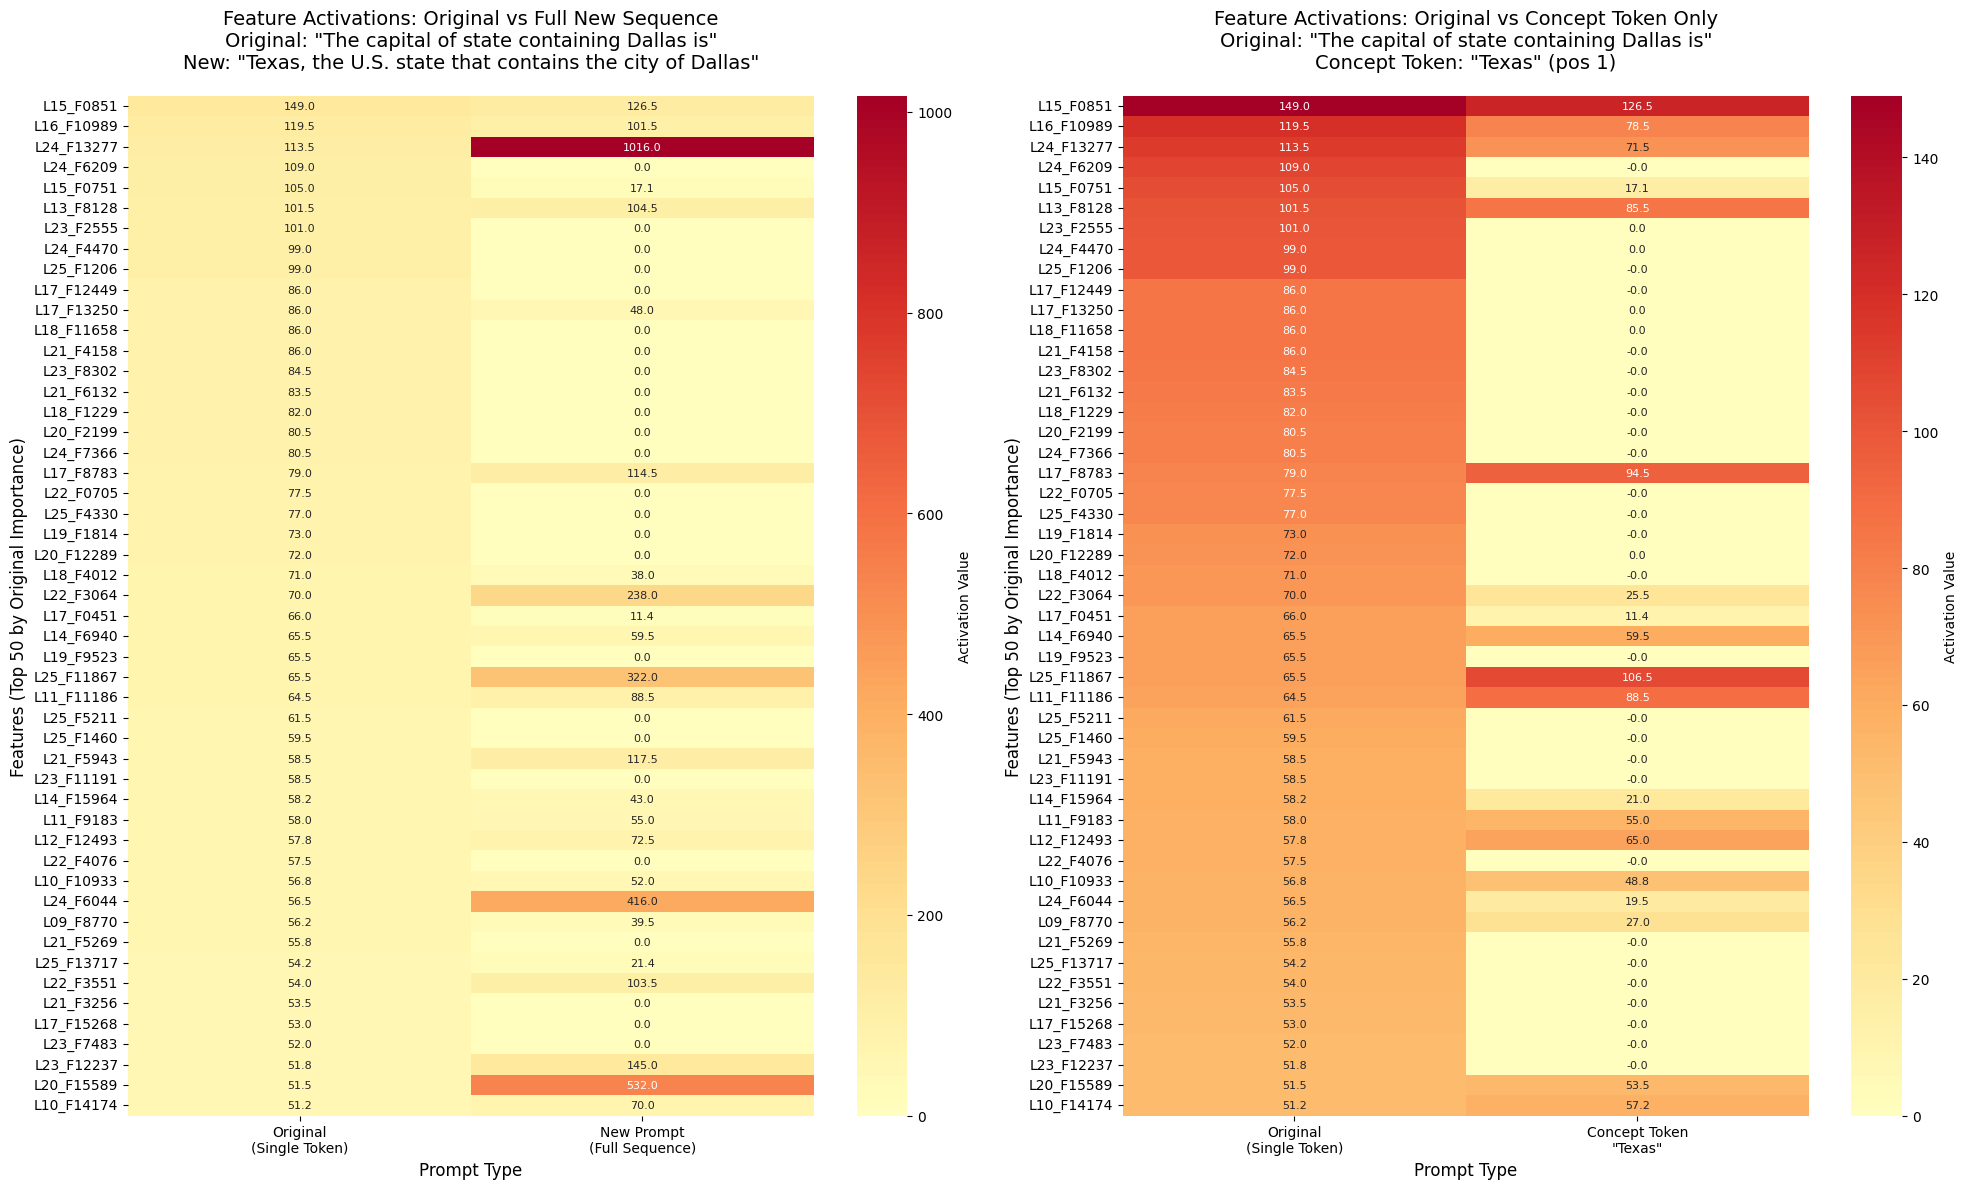

🔍 HEATMAP ANALYSIS:
📊 Correlation between Original and Full Sequence: 0.109
📊 Correlation between Original and Concept Token: 0.275

🔥 Features much more active in FULL sequence (7):
   L24_F13277:  113.5 → 1016.0 ( 9.0x)
   L22_F3064:   70.0 →  238.0 ( 3.4x)
   L25_F11867:   65.5 →  322.0 ( 4.9x)
   L21_F5943:   58.5 →  117.5 ( 2.0x)
   L24_F6044:   56.5 →  416.0 ( 7.4x)
   L23_F12237:   51.8 →  145.0 ( 2.8x)
   L20_F15589:   51.5 →  532.0 (10.3x)

🏴 Features much more active on CONCEPT TOKEN (0):

✅ Heatmaps created successfully!
📊 Analyzed top 50 features out of 4872 total


In [ ]:
#@title Create heatmaps comparing feature activations

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def create_feature_heatmaps(activations, concept_token_pos, concept_token, prompt, new_prompt, top_n=50):
    """
    Create two heatmaps comparing feature activations:
    1. Original vs Full Sequence (aggregate)
    2. Original vs Concept Token Only
    """

    # Sort features by original activation (most important first)
    sorted_features = sorted(activations.items(),
                           key=lambda x: abs(x[1]['original_activation']),
                           reverse=True)

    # Take top N features for visualization
    top_features = sorted_features[:top_n]

    # Prepare data for heatmaps
    feature_names = []
    original_acts = []
    aggregate_acts = []
    concept_acts = []

    for (layer, feat_idx), info in top_features:
        feature_name = f"L{layer:02d}_F{feat_idx:04d}"
        feature_names.append(feature_name)

        original_acts.append(info['original_activation'])
        aggregate_acts.append(info['aggregate_activation'])

        # Get activation specifically on the concept token
        seq_acts = info['seq_activations']
        concept_activation = seq_acts[concept_token_pos].item() if concept_token_pos < len(seq_acts) else 0.0
        concept_acts.append(concept_activation)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

    # === HEATMAP 1: Original vs Full Sequence ===

    # Create data matrix for first heatmap
    data1 = np.array([original_acts, aggregate_acts]).T

    # Create DataFrame for better labeling
    df1 = pd.DataFrame(data1,
                       index=feature_names,
                       columns=['Original\n(Single Token)', 'New Prompt\n(Full Sequence)'])

    # Create heatmap 1
    sns.heatmap(df1,
                annot=True,
                fmt='.1f',
                cmap='RdYlBu_r',
                center=0,
                cbar_kws={'label': 'Activation Value'},
                ax=ax1,
                annot_kws={'size': 8})

    ax1.set_title(f'Feature Activations: Original vs Full New Sequence\n' +
                  f'Original: "{prompt}"\n' +
                  f'New: "{new_prompt}"',
                  fontsize=14, pad=20)
    ax1.set_xlabel('Prompt Type', fontsize=12)
    ax1.set_ylabel('Features (Top 50 by Original Importance)', fontsize=12)

    # === HEATMAP 2: Original vs Concept Token ===

    # Create data matrix for second heatmap
    data2 = np.array([original_acts, concept_acts]).T

    # Create DataFrame for better labeling
    df2 = pd.DataFrame(data2,
                       index=feature_names,
                       columns=['Original\n(Single Token)', f'Concept Token\n"{concept_token}"'])

    # Create heatmap 2
    sns.heatmap(df2,
                annot=True,
                fmt='.1f',
                cmap='RdYlBu_r',
                center=0,
                cbar_kws={'label': 'Activation Value'},
                ax=ax2,
                annot_kws={'size': 8})

    ax2.set_title(f'Feature Activations: Original vs Concept Token Only\n' +
                  f'Original: "{prompt}"\n' +
                  f'Concept Token: "{concept_token}" (pos {concept_token_pos})',
                  fontsize=14, pad=20)
    ax2.set_xlabel('Prompt Type', fontsize=12)
    ax2.set_ylabel('Features (Top 50 by Original Importance)', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # === ADDITIONAL ANALYSIS ===

    print("🔍 HEATMAP ANALYSIS:")
    print("="*80)

    # Calculate correlations
    corr_full = np.corrcoef(original_acts, aggregate_acts)[0, 1]
    corr_concept = np.corrcoef(original_acts, concept_acts)[0, 1]

    print(f"📊 Correlation between Original and Full Sequence: {corr_full:.3f}")
    print(f"📊 Correlation between Original and Concept Token: {corr_concept:.3f}")

    # Find features that are much more active in new context
    increased_full = [(name, orig, agg) for name, orig, agg in zip(feature_names, original_acts, aggregate_acts)
                      if agg > 2 * abs(orig) and abs(orig) > 1e-6]

    increased_concept = [(name, orig, conc) for name, orig, conc in zip(feature_names, original_acts, concept_acts)
                         if conc > 2 * abs(orig) and abs(orig) > 1e-6]

    print(f"\n🔥 Features much more active in FULL sequence ({len(increased_full)}):")
    for name, orig, new in increased_full[:10]:
        ratio = new / orig if abs(orig) > 1e-6 else float('inf')
        print(f"   {name}: {orig:6.1f} → {new:6.1f} ({ratio:4.1f}x)")

    print(f"\n🏴 Features much more active on CONCEPT TOKEN ({len(increased_concept)}):")
    for name, orig, new in increased_concept[:10]:
        ratio = new / orig if abs(orig) > 1e-6 else float('inf')
        print(f"   {name}: {orig:6.1f} → {new:6.1f} ({ratio:4.1f}x)")

    # Find features that activate strongly on concept but not across full sequence
    concept_specific = []
    for i, (name, orig, agg, conc) in enumerate(zip(feature_names, original_acts, aggregate_acts, concept_acts)):
        if conc > 10 and conc > 1.5 * agg and abs(conc) > 1e-6:  # Strong on concept, weaker on full sequence
            concept_specific.append((name, orig, agg, conc))

    if concept_specific:
        print(f"\n🎯 Features specifically tuned to CONCEPT TOKEN ({len(concept_specific)}):")
        for name, orig, agg, conc in concept_specific[:10]:
            print(f"   {name}: orig={orig:5.1f}, full={agg:5.1f}, concept={conc:5.1f}")

    return df1, df2

# Create the heatmaps
print("🎨 Creating feature activation heatmaps...")
print("="*80)

try:
    df_full, df_concept = create_feature_heatmaps(
        activations=activations,
        concept_token_pos=concept_token_pos,
        concept_token=concept_token,
        prompt=prompt,
        new_prompt=new_prompt,
        top_n=50  # Show top 50 features
    )

    print(f"\n✅ Heatmaps created successfully!")
    print(f"📊 Analyzed top 50 features out of {len(activations)} total")

except Exception as e:
    print(f"❌ Error creating heatmaps: {e}")
    import traceback
    traceback.print_exc()

In [ ]:
# ╔══════════════════════════════════════════════════════════════════════╗
# ║  analyse one feature: L15_F0851                                      ║
# ╚══════════════════════════════════════════════════════════════════════╝

import torch

layer = 24
feat_idx = 13277

# ─── recupera dati dal dizionario se già esistono ──────────────────────
if 'activations' in globals() and (layer, feat_idx) in activations:
    info = activations[(layer, feat_idx)]
    seq_acts = torch.tensor(info['seq_activations'])
    new_tokens = new_tokens        # già definito in cella precedente
    orig_act = info['original_activation']
else:
    # se non c'è ancora nulla, calcola tutto da zero
    prompt2 = "Texas, the U.S. state that contains the city of Dallas"
    _, acts_tensor = model.get_activations(prompt2, zero_bos=False)
    tokenizer = model.tokenizer
    new_tokens = [tokenizer.decode([t]) for t in tokenizer.encode(prompt2)[0]]
    seq_acts = acts_tensor[layer, :, feat_idx].cpu()
    orig_act = next(
        val.item() for i, val in enumerate(graph.activation_values)
        if graph.active_features[i, 0] == layer
        and graph.active_features[i, 2] == feat_idx
    )

# ─── statistiche ───────────────────────────────────────────────────────
max_act = seq_acts.max().item()
mean_act = seq_acts.mean().item()
max_pos = seq_acts.argmax().item()

print(f"\nfeature L{layer}_F{feat_idx:04d}")
print(f"original activation (prompt 1): {orig_act:.3f}")
print(f"max activation   (prompt 2): {max_act:.3f} at pos {max_pos} → '{new_tokens[max_pos]}'")
print(f"mean activation  (prompt 2): {mean_act:.3f}")


print("\ntoken‑by‑token activations:")
for pos, (tok, act) in enumerate(zip(new_tokens, seq_acts)):
    marker = " ← max" if pos == max_pos else ""
    print(f"{pos:2d}. {tok!r:12s} {act:7.3f}{marker}")



feature L24_F13277
original activation (prompt 1): 113.500
max activation   (prompt 2): 124.000 at pos 10 → ' contains'
mean activation  (prompt 2): 68.000

token‑by‑token activations:
 0. '<bos>'       10.000
 1. 'Texas'       71.500
 2. ','           70.000
 3. ' the'       100.000
 4. ' U'          -0.000
 5. '.'           -0.000
 6. 'S'           53.000
 7. '.'           74.500
 8. ' state'      99.000
 9. ' that'      101.500
10. ' contains'  124.000 ← max
11. ' the'        97.000
12. ' city'       92.000
13. ' of'        102.000
14. ' Dallas'     22.750


/tmp/ipython-input-49-2613295639.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq_acts = torch.tensor(info['seq_activations'])


In [ ]:
# token‑by‑token activations for feature L15_F0851 on both prompts

layer, feat_idx = 24, 13277
prompt1 = prompt                                   # prompt originale
prompt2 = new_prompt                               # prompt nuovo

def seq_acts_and_tokens(text):
    _, acts = model.get_activations(text, zero_bos=False)
    seq_acts = acts[layer, :, feat_idx].cpu()
    tok_ids = model.tokenizer(text, return_tensors='pt').input_ids[0]
    tokens = [model.tokenizer.decode([t]) for t in tok_ids]
    return tokens, seq_acts

tok1, act1 = seq_acts_and_tokens(prompt1)
tok2, act2 = seq_acts_and_tokens(prompt2)

print(f"\nfeature L{layer}_F{feat_idx:04d}\n")

print("prompt 1:", repr(prompt1))
for i, (tok, val) in enumerate(zip(tok1, act1)):
    flag = " ← max" if i == act1.argmax().item() else ""
    print(f"{i:2d}. {tok!r:12s} {val:7.3f}{flag}")

print("\nprompt 2:", repr(prompt2))
for i, (tok, val) in enumerate(zip(tok2, act2)):
    flag = " ← max" if i == act2.argmax().item() else ""
    print(f"{i:2d}. {tok!r:12s} {val:7.3f}{flag}")



feature L24_F13277

prompt 1: 'The capital of state containing Dallas is'
 0. '<bos>'       10.000
 1. 'The'         87.000
 2. ' capital'    95.500
 3. ' of'         79.000
 4. ' state'      76.500
 5. ' containing'  91.000
 6. ' Dallas'     52.000
 7. ' is'        113.500 ← max

prompt 2: 'Texas, the U.S. state that contains the city of Dallas'
 0. '<bos>'       10.000
 1. 'Texas'       71.500
 2. ','           70.000
 3. ' the'       100.000
 4. ' U'          -0.000
 5. '.'           -0.000
 6. 'S'           53.000
 7. '.'           74.500
 8. ' state'      99.000
 9. ' that'      101.500
10. ' contains'  124.000 ← max
11. ' the'        97.000
12. ' city'       92.000
13. ' of'        102.000
14. ' Dallas'     22.750


Congrats, you're done! Go to `intervention_demo.ipynb` to see how to perform interventions, or check out `gemma_demo.ipynb` and `llama_demo.ipynb` for examples of worked-out test examples. Read on for a bit more info aabout the Graph class and pruning.

## Graphs

Earlier, you created a graph object. Its adjacency matrix / edge weights are stored in `graph.adjacency_matrix` in a dense format; rows are target nodes and columns are source nodes. The first `len(graph.real_features)` entries of the matrix represent features; the `i`th entry corresponds to the `i`th feature in `graph.real_features`, given in `(layer, position, feature_idx)` format. The next `graph.cfg.n_layers * graph.n_pos` entries are error_nodes. The next `graph.n_pos` entries are token nodes. The final `len(graph.logit_tokens)` entries are logit nodes.

The value of the cell `graph.adjacency_matrix[target, source]` is the direct effect of the source node on the target node. That is, it tells you how much the target node's value would change if the source node were set to 0, while holding the attention patterns, layernorm denominators, and other feature activations constatnt. Thus, if the target node is a feature, this tells you how much the target feature would change; if the target node is a logit, this tells you how much the (de-meaned) value of the logit would change.

Note that `gemma-2-2b` is model (family) that uses logit softcapping. This means that a softcap function, `softcap(x) = t * tanh(x/t)` is used to constrain the logits to fall within (-t, t); `gemma-2-2b` uses `t=30`. For such models, we predict the change in logits *pre-softcap*, as the nonlinearity introduced by softcapping would cause our attribution to yield incorrect / approximate direct effect values.

### Pruning
Given a graph, you might want to prune it, as it will otherwise contain many low-impact nodes and edges that clutter the circuit diagram while adding little information. We enable you to prune nodes by absolute influence, i.e. the total impact that the nodes have on the logits, direct and indirect. The default threshold is 0.8: this means we will keep the minimum number of nodes required to capture 80% of all logit effects. Similarly, the edge_threshold, by default 0.98, means that we will keep the minimum number of edges required to capture 98% of all logit effects.

In [ ]:
from circuit_tracer.graph import prune_graph
prune_graph(graph, node_threshold=0.7, edge_threshold=0.95)


# MIO NON RUNNARE confrontare con graph generato da altri prompt (non mi interessa direttamente)

In [ ]:
# 1. Ottenere la lista delle feature attive
active_features = graph.active_features
print(f"Numero totale di feature attive: {len(active_features)}")
print(f"Tipo di active_features: {type(active_features)}")
print(f"Prime 10 feature attive: {active_features[:10]}")

print("\n" + "="*60)

# 2. Esplorare selected_features se diverso da active_features
selected_features = graph.selected_features
print(f"Numero di feature selezionate: {len(selected_features)}")
print(f"Tipo di selected_features: {type(selected_features)}")
print(f"Prime 10 feature selezionate: {selected_features[:10]}")

print("\n" + "="*60)

# 3. Vedere i valori di attivazione
activation_values = graph.activation_values
print(f"Activation values shape: {activation_values.shape}")
print(f"Tipo di activation_values: {type(activation_values)}")

print("\n" + "="*60)

# 4. Informazioni sui token di input e output
print(f"Input string: '{graph.input_string}'")
print(f"Input tokens: {graph.input_tokens}")
print(f"Numero di token di input: {len(graph.input_tokens)}")
print(f"Logit tokens: {graph.logit_tokens}")
print(f"Logit probabilities: {graph.logit_probabilities}")

print("\n" + "="*60)

# 5. Informazioni sulla matrice di adiacenza
print(f"Adjacency matrix shape: {graph.adjacency_matrix.shape}")
print(f"Adjacency matrix type: {type(graph.adjacency_matrix)}")

# 6. Configurazione del modello
print(f"\nConfigurazione:")
print(f"Numero di posizioni: {graph.n_pos}")
if hasattr(graph.cfg, 'n_layers'):
    print(f"Numero di layer: {graph.cfg.n_layers}")

Numero totale di feature attive: 6362
Tipo di active_features: <class 'torch.Tensor'>
Prime 10 feature attive: tensor([[   0,    1,   41],
        [   0,    1,   96],
        [   0,    1,  253],
        [   0,    1,  354],
        [   0,    1,  478],
        [   0,    1, 1131],
        [   0,    1, 1903],
        [   0,    1, 2146],
        [   0,    1, 2344],
        [   0,    1, 2364]])

Numero di feature selezionate: 6362
Tipo di selected_features: <class 'torch.Tensor'>
Prime 10 feature selezionate: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Activation values shape: torch.Size([6362])
Tipo di activation_values: <class 'torch.Tensor'>

Input string: '<bos>The capital of state containing Dallas is'
Input tokens: tensor([    2,   651,  6037,   576,  2329, 10751, 26865,   603])
Numero di token di input: 8
Logit tokens: tensor([ 22605,    573, 235248, 235292,   9447,   9778,  26865,    109,    476,
          3151])
Logit probabilities: tensor([0.3203, 0.0918, 0.0713, 0.0491, 0.0491, 0.0383

In [ ]:
import numpy as np
import torch
from collections import defaultdict

# 1. Salviamo i dati del grafo originale per il confronto
original_prompt = graph.input_string
original_features = graph.active_features
original_activations = graph.activation_values
original_logits = graph.logit_tokens
original_probs = graph.logit_probabilities

print(f"Grafo originale:")
print(f"  Prompt: '{original_prompt}'")
print(f"  Feature attive: {len(original_features)}")
print(f"  Top logit: '{original_logits[0]}' (prob: {original_probs[0]:.4f})")

print("\n" + "="*60)

# 2. Funzione per testare una nuova stringa
def test_new_prompt(new_prompt, model, compare_with_original=True):
    """
    Testa una nuova stringa e confronta le attivazioni con l'originale
    """
    print(f"Testando nuovo prompt: '{new_prompt}'")

    # Esegui attribution sulla nuova stringa
    new_graph = attribute(
        prompt=new_prompt,
        model=model,
        max_n_logits=10,
        desired_logit_prob=0.95,
        batch_size=256,
        max_feature_nodes=8192,
        offload='disk' if IN_COLAB else 'cpu',
        verbose=True
    )

    new_features = new_graph.active_features
    new_activations = new_graph.activation_values
    new_logits = new_graph.logit_tokens
    new_probs = new_graph.logit_probabilities

    print(f"\nRisultati per nuovo prompt:")
    print(f"  Feature attive: {len(new_features)}")
    print(f"  Top logit: '{new_logits[0]}' (prob: {new_probs[0]:.4f})")

    if compare_with_original:
        print(f"\n" + "="*40 + " CONFRONTO " + "="*40)

        # Confronta feature attive
        original_set = set(original_features)
        new_set = set(new_features)

        common_features = original_set.intersection(new_set)
        only_original = original_set - new_set
        only_new = new_set - original_set

        print(f"Feature in comune: {len(common_features)}")
        print(f"Feature solo nell'originale: {len(only_original)}")
        print(f"Feature solo nel nuovo: {len(only_new)}")

        # Mostra alcune feature specifiche
        if len(common_features) > 0:
            print(f"\nPrime 10 feature in comune: {list(common_features)[:10]}")

        if len(only_original) > 0:
            print(f"Prime 10 feature solo nell'originale: {list(only_original)[:10]}")

        if len(only_new) > 0:
            print(f"Prime 10 feature solo nel nuovo: {list(only_new)[:10]}")

        # Confronta i top logit
        print(f"\nTop 5 logit originali: {original_logits[:5]}")
        print(f"Top 5 logit nuovi: {new_logits[:5]}")

        # Calcola overlap nei top logit
        common_logits = set(original_logits[:5]).intersection(set(new_logits[:5]))
        print(f"Logit in comune nei top 5: {common_logits}")

    return new_graph

# 3. Esempio di uso - inserisci qui la tua nuova stringa
new_prompt = "Texas, the U.S. state that contains both Dallas and Austin"  # Cambia questa stringa!

# Testa la nuova stringa
new_graph = test_new_prompt(new_prompt, model, compare_with_original=True)

Phase 0: Precomputing activations and vectors
Precomputation completed in 0.14s
Found 12426 active features


Grafo originale:
  Prompt: '<bos>The capital of state containing Dallas is'
  Feature attive: 6362
  Top logit: '22605' (prob: 0.3203)

Testando nuovo prompt: 'Texas, the U.S. state that contains both Dallas and Austin'


Phase 1: Running forward pass
Forward pass completed in 0.74s
Phase 2: Building input vectors
Selected 6 logits with cumulative probability 0.9531
Will include 8192 of 12426 feature nodes
Input vectors built in 9.37s
Phase 3: Computing logit attributions
Logit attributions completed in 0.24s
Phase 4: Computing feature attributions
Feature influence computation: 100%|██████████| 8192/8192 [00:08<00:00, 981.76it/s]
Feature attributions completed in 8.35s
Attribution completed in 41.45s



Risultati per nuovo prompt:
  Feature attive: 12426
  Top logit: '235269' (prob: 0.8906)

======================================== CONFRONTO ========================================
Feature in comune: 0
Feature solo nell'originale: 6362
Feature solo nel nuovo: 12426
Prime 10 feature solo nell'originale: [tensor([   0,    1, 8489]), tensor([  17,    6, 9905]), tensor([   1,    2, 1707]), tensor([   2,    2, 7137]), tensor([   1,    2, 9978]), tensor([    0,     4, 10754]), tensor([    2,     2, 11838]), tensor([   3,    4, 3205]), tensor([    4,     1, 14592]), tensor([   6,    7, 1920])]
Prime 10 feature solo nel nuovo: [tensor([  4,  14, 945], device='cuda:0'), tensor([   0,   14, 7043], device='cuda:0'), tensor([  21,    3, 3288], device='cuda:0'), tensor([   0,   12, 5369], device='cuda:0'), tensor([    0,    10, 10205], device='cuda:0'), tensor([   7,    8, 6057], device='cuda:0'), tensor([   7,    6, 6884], device='cuda:0'), tensor([   4,   10, 6087], device='cuda:0'), tensor([  

In [ ]:
import torch

# 1. Convertire i token IDs in testo per renderli più leggibili
def decode_tokens(token_ids, model):
    """Converte token IDs in testo leggibile"""
    if hasattr(model, 'tokenizer'):
        tokenizer = model.tokenizer
    elif hasattr(model, 'model') and hasattr(model.model, 'tokenizer'):
        tokenizer = model.model.tokenizer
    else:
        print("Tokenizer non trovato, mostro solo gli IDs")
        return [str(id.item()) for id in token_ids]

    try:
        # Converti tensor in lista se necessario
        if torch.is_tensor(token_ids):
            token_ids = token_ids.cpu().tolist()

        tokens_text = []
        for token_id in token_ids:
            try:
                text = tokenizer.decode([token_id])
                tokens_text.append(f"'{text}' ({token_id})")
            except:
                tokens_text.append(f"ID:{token_id}")
        return tokens_text
    except Exception as e:
        print(f"Errore nella decodifica: {e}")
        return [str(id) for id in token_ids]

print("="*80)
print("ANALISI DETTAGLIATA DEI RISULTATI")
print("="*80)

# 2. Analizzare i logit in modo più dettagliato
print("TOP LOGIT DECODIFICATI:")
print("\nPrompt originale:", original_prompt)
original_logit_texts = decode_tokens(original_logits[:5], model)
for i, logit_text in enumerate(original_logit_texts):
    prob = original_probs[i].item()
    print(f"  {i+1}. {logit_text} - probabilità: {prob:.4f}")

print(f"\nNuovo prompt: {new_graph.input_string}")
new_logit_texts = decode_tokens(new_graph.logit_tokens[:5], model)
for i, logit_text in enumerate(new_logit_texts):
    prob = new_graph.logit_probabilities[i].item()
    print(f"  {i+1}. {logit_text} - probabilità: {prob:.4f}")

# 3. Controllare meglio le feature in comune (il confronto precedente potrebbe essere sbagliato)
print("\n" + "="*50 + " FEATURE ANALYSIS " + "="*50)

# Convertire le feature in tuple per il confronto
def features_to_tuples(features):
    """Converte feature tensor in tuple per confronto"""
    if torch.is_tensor(features[0]):
        return [tuple(f.cpu().tolist()) for f in features]
    return [tuple(f) for f in features]

original_features_tuples = features_to_tuples(original_features)
new_features_tuples = features_to_tuples(new_graph.active_features)

original_set = set(original_features_tuples)
new_set = set(new_features_tuples)

common_features = original_set.intersection(new_set)
only_original = original_set - new_set
only_new = new_set - original_set

print(f"CONFRONTO CORRETTO DELLE FEATURE:")
print(f"  Feature nell'originale: {len(original_features)}")
print(f"  Feature nel nuovo: {len(new_graph.active_features)}")
print(f"  Feature in comune: {len(common_features)}")
print(f"  Feature solo nell'originale: {len(only_original)}")
print(f"  Feature solo nel nuovo: {len(only_new)}")

if len(common_features) > 0:
    print(f"\nPrime 10 feature in comune:")
    for i, feat in enumerate(list(common_features)[:10]):
        print(f"  {i+1}. Layer {feat[0]}, Pos {feat[1]}, Feature {feat[2]}")
else:
    print("\n⚠️  NESSUNA FEATURE IN COMUNE!")
    print("   Questo suggerisce che i due prompt attivano circuiti completamente diversi")

# 4. Analisi della distribuzione delle feature per layer
print(f"\n" + "="*40 + " DISTRIBUZIONE PER LAYER " + "="*40)

def analyze_layer_distribution(features, name):
    layer_counts = {}
    for feat in features:
        if torch.is_tensor(feat):
            layer = feat[0].item()
        else:
            layer = feat[0]
        layer_counts[layer] = layer_counts.get(layer, 0) + 1

    print(f"\n{name}:")
    for layer in sorted(layer_counts.keys())[:10]:  # Prime 10 layer
        print(f"  Layer {layer}: {layer_counts[layer]} feature")

    return layer_counts

original_dist = analyze_layer_distribution(original_features, "Distribuzione originale")
new_dist = analyze_layer_distribution(new_graph.active_features, "Distribuzione nuovo prompt")

# 5. Calcola percentuale di overlap
total_unique_features = len(original_set.union(new_set))
overlap_percentage = (len(common_features) / total_unique_features) * 100 if total_unique_features > 0 else 0

print(f"\n" + "="*50 + " SUMMARY " + "="*50)
print(f"Overlap percentuale delle feature: {overlap_percentage:.2f}%")
print(f"Similarità semantica: {'Molto bassa' if overlap_percentage < 10 else 'Bassa' if overlap_percentage < 30 else 'Media' if overlap_percentage < 60 else 'Alta'}")

ANALISI DETTAGLIATA DEI RISULTATI
TOP LOGIT DECODIFICATI:

Prompt originale: <bos>The capital of state containing Dallas is
  1. ' Austin' (22605) - probabilità: 0.3203
  2. ' the' (573) - probabilità: 0.0918
  3. ' ' (235248) - probabilità: 0.0713
  4. ':' (235292) - probabilità: 0.0491
  5. ' Texas' (9447) - probabilità: 0.0491

Nuovo prompt: <bos>Texas, the U.S. state that contains both Dallas and Austin
  1. ',' (235269) - probabilità: 0.8906
  2. ' and' (578) - probabilità: 0.0210
  3. ' (' (591) - probabilità: 0.0186
  4. '.' (235265) - probabilità: 0.0077
  5. ' —' (2062) - probabilità: 0.0077

================================================== FEATURE ANALYSIS ==================================================
CONFRONTO CORRETTO DELLE FEATURE:
  Feature nell'originale: 6362
  Feature nel nuovo: 12426
  Feature in comune: 629
  Feature solo nell'originale: 5733
  Feature solo nel nuovo: 11797

Prime 10 feature in comune:
  1. Layer 10, Pos 1, Feature 14270
  2. Layer 8, Pos 7, F

In [ ]:
import numpy as np
import pandas as pd

def analyze_common_features_detailed(original_graph, new_graph, top_n=20):
    """
    Analizza in dettaglio le feature in comune tra due grafi
    """
    print("="*80)
    print("ANALISI DETTAGLIATA DELLE FEATURE IN COMUNE")
    print("="*80)

    # Estrai dati da entrambi i grafi
    orig_features = original_graph.active_features
    new_features = new_graph.active_features

    orig_activations = original_graph.activation_values
    new_activations = new_graph.activation_values

    # Trova feature in comune
    orig_set = set(orig_features)
    new_set = set(new_features)
    common_features = orig_set.intersection(new_set)

    print(f"Prompt originale: '{original_graph.input_string}'")
    print(f"Nuovo prompt: '{new_graph.input_string}'")
    print(f"Feature in comune: {len(common_features)} su {len(orig_set)} + {len(new_set)}")

    if len(common_features) == 0:
        print("Nessuna feature in comune trovata!")
        return

    # Crea mappature feature -> indice per accedere ai valori di attivazione
    orig_feature_to_idx = {feat: idx for idx, feat in enumerate(orig_features)}
    new_feature_to_idx = {feat: idx for idx, feat in enumerate(new_features)}

    # Raccoglie i dati delle feature in comune
    common_data = []

    for feature in common_features:
        if feature in orig_feature_to_idx and feature in new_feature_to_idx:
            orig_idx = orig_feature_to_idx[feature]
            new_idx = new_feature_to_idx[feature]

            # Estrai valori di attivazione (potrebbero essere tensori)
            orig_val = orig_activations[orig_idx] if orig_idx < len(orig_activations) else 0
            new_val = new_activations[new_idx] if new_idx < len(new_activations) else 0

            # Converti in scalari se necessario
            if hasattr(orig_val, 'item'):
                orig_val = orig_val.item()
            if hasattr(new_val, 'item'):
                new_val = new_val.item()

            # Calcola differenza e ratio
            diff = new_val - orig_val
            ratio = new_val / orig_val if orig_val != 0 else float('inf')

            common_data.append({
                'feature': feature,
                'original_activation': orig_val,
                'new_activation': new_val,
                'difference': diff,
                'ratio': ratio,
                'max_activation': max(abs(orig_val), abs(new_val)),
                'layer': feature[0] if isinstance(feature, tuple) and len(feature) > 0 else 'N/A',
                'position': feature[1] if isinstance(feature, tuple) and len(feature) > 1 else 'N/A',
                'feature_idx': feature[2] if isinstance(feature, tuple) and len(feature) > 2 else feature
            })

    if not common_data:
        print("Impossibile estrarre i valori di attivazione!")
        return

    # Converti in DataFrame per analisi più facile
    df = pd.DataFrame(common_data)

    print(f"\n📊 STATISTICHE GENERALI:")
    print(f"Attivazione media originale: {df['original_activation'].mean():.4f}")
    print(f"Attivazione media nuova: {df['new_activation'].mean():.4f}")
    print(f"Differenza media: {df['difference'].mean():.4f}")
    print(f"Deviazione standard differenze: {df['difference'].std():.4f}")

    # Top feature per attivazione massima
    print(f"\n🔥 TOP {min(top_n, len(df))} FEATURE PER INTENSITÀ MASSIMA:")
    print("-" * 100)
    top_by_intensity = df.nlargest(top_n, 'max_activation')

    for i, row in top_by_intensity.iterrows():
        print(f"Feature: {row['feature']}")
        print(f"  Layer: {row['layer']}, Pos: {row['position']}, Idx: {row['feature_idx']}")
        print(f"  Originale: {row['original_activation']:.4f}")
        print(f"  Nuova: {row['new_activation']:.4f}")
        print(f"  Differenza: {row['difference']:+.4f}")
        print(f"  Ratio: {row['ratio']:.2f}x")
        print()

    # Feature con maggiore aumento
    print(f"\n📈 TOP {min(10, len(df))} FEATURE CON MAGGIORE AUMENTO:")
    print("-" * 100)
    top_increases = df.nlargest(10, 'difference')

    for i, row in top_increases.iterrows():
        if row['difference'] > 0:
            print(f"Feature {row['feature']}: {row['original_activation']:.4f} → {row['new_activation']:.4f} (+{row['difference']:.4f})")

    # Feature con maggiore diminuzione
    print(f"\n📉 TOP {min(10, len(df))} FEATURE CON MAGGIORE DIMINUZIONE:")
    print("-" * 100)
    top_decreases = df.nsmallest(10, 'difference')

    for i, row in top_decreases.iterrows():
        if row['difference'] < 0:
            print(f"Feature {row['feature']}: {row['original_activation']:.4f} → {row['new_activation']:.4f} ({row['difference']:.4f})")

    # Distribuzione per layer (se disponibile)
    if 'layer' in df.columns and df['layer'].iloc[0] != 'N/A':
        print(f"\n🏗️ DISTRIBUZIONE PER LAYER:")
        print("-" * 50)
        layer_stats = df.groupby('layer').agg({
            'original_activation': 'mean',
            'new_activation': 'mean',
            'difference': 'mean',
            'feature': 'count'
        }).round(4)
        layer_stats.columns = ['Orig_Avg', 'New_Avg', 'Diff_Avg', 'Count']
        print(layer_stats)

    return df

# Esegui l'analisi dettagliata
# Assicurati di aver già eseguito il codice precedente con new_graph definito
if 'new_graph' in locals():
    detailed_analysis = analyze_common_features_detailed(graph, new_graph, top_n=15)
else:
    print("Esegui prima il codice precedente per creare new_graph!")

ANALISI DETTAGLIATA DELLE FEATURE IN COMUNE
Prompt originale: '<bos>The capital of state containing Dallas is'
Nuovo prompt: '<bos>Texas, the U.S. state that contains both Dallas and Austin'
Feature in comune: 0 su 6362 + 12426
Nessuna feature in comune trovata!


##confrontare con feature (senza graph) attivate da altro prompt

In [ ]:
new_prompt = "Texas, the U.S. state that contains both Dallas and Austin"

In [ ]:
###IMPLEMENTAZIONE MINIMA###

# estrai le stesse feature del grafo iniziale sul nuovo prompt
with torch.inference_mode():
    _, acts = model.get_activations(new_prompt)#, zero_bos=False)   # (layer, pos, feature)

results = {}
for i in range(graph.active_features.shape[0]):
    layer, pos, feat = map(int, graph.active_features[i])
    orig_act = graph.activation_values[i].item()
    seq_acts = acts[layer, :, feat]    # attivazioni su tutta la sequenza
    max_act  = seq_acts.max().item()
    mean_act = seq_acts.mean().item()
    results[(layer, feat)] = {
        "original": orig_act,
        "max_new": max_act,
        "mean_new": mean_act,
        "delta_norm": (max_act - orig_act) / (abs(orig_act) + 1e-6),
    }

print(f"estratte {len(results)} feature; la prima:",
      next(iter(results.items())))


estratte 4865 feature; la prima: ((0, 41), {'original': 2.53125, 'max_new': -0.0, 'mean_new': 0.0, 'delta_norm': -0.9999996049384277})


In [ ]:
import pandas as pd
import math

# costruisci le righe a partire dal dizionario 'activations'
rows = []
for (layer, feat_idx), info in activations.items():
    old_act = info.get('original_activation', float('nan'))
    new_act = info.get('aggregate_activation', float('nan'))  # somma sulla sequenza

    # converti con sicurezza in float python
    try:
        old_act = float(old_act)
    except Exception:
        old_act = float('nan')
    try:
        new_act = float(new_act)
    except Exception:
        new_act = float('nan')

    rows.append({
        'layer': layer,
        'feature': feat_idx,
        'attivazione_vecchio_prompt': old_act,
        'attivazione_nuovo_prompt': new_act,
    })

df_attivazioni = (
    pd.DataFrame(rows)
      .set_index(['layer', 'feature'])
      .sort_index()
)

# visualizzazione rapida
print(df_attivazioni.shape)
df_attivazioni.head(10)


(4865, 2)


attivazione_vecchio_prompt  attivazione_nuovo_prompt
layer feature                                                      
0     2                          1.210938                  2.312500
      4                          1.875000                  7.906250
      33                         0.632812                  0.621094
      41                         2.531250                  0.000000
      49                         4.468750                  3.890625
      52                         2.062500                  0.859375
      65                         4.781250                  4.812500
      69                         1.109375                  0.000000
      76                         2.656250                  0.000000
      96                         3.546875                  0.000000

from matplotlib import pyplot as plt
_df_0['attivazione_vecchio_prompt'].plot(kind='hist', bins=20, title='attivazione_vecchio_prompt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['attivazione_nuovo_prompt'].plot(kind='hist', bins=20, title='attivazione_nuovo_prompt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='attivazione_vecchio_prompt', y='attivazione_nuovo_prompt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['attivazione_vecchio_prompt'].plot(kind='line', figsize=(8, 4), title='attivazione_vecchio_prompt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['attivazione_nuovo_prompt'].plot(kind='line', figsize=(8, 4), title='attivazione_nuovo_prompt')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
concepts = [
    {"label": "Dallas", "category": "entity", "description": "A major city in the U.S. state of Texas, used here to identify the containing state."},
    {"label": "Texas", "category": "entity", "description": "The U.S. state that contains the city of Dallas."},
    {"label": "Austin", "category": "entity", "description": "The capital city of the state of Texas."},
    {"label": "Capital of Texas", "category": "attribute", "description": "Austin is identified as the capital city of the state that contains Dallas."},
    {"label": "Containment relationship", "category": "relationship", "description": "Dallas is located within the state of Texas."}
]